# FIFA  PLAYER  VALUE  PREDICTIONS



The purpose of this project is to take a dataset of European FIFA players and develop a multiple linear regression model that can predict the value of new players.

***Target Variable:*** Player Value


## The Business Case

TEAM NAME has struggled to acuire and retain top talent, which has resulted in game losses, a notcable decrease in brand equity, and financial losses in merchandising and ticket sales.  TEAM NAME has approached EA Sports, the video game developer, to help them revamp their recruiting and contracting because EA has the data and technology to simulate the entire FIFA organization.  TEAM NAME wants to identify top talent sooner, when players are young, determine their market value, and execute a long term contract that is financially advantageous.  In addition to top players who can win championships, they want players with an engaging personality who can win a die-hard fan base.  Their key questions include:
  *   What are the key characteristics of a top player, which can be identified at the beginning of a career?
  *   Is there any truth to the old belief that left footed players are more valuable than right footed?
  *   What is the average value of players based on their age group, especially the 16-19 age range?
  *   What type of linear regression machine learning model can accurately identify top talent and determine their market value?


## The Data

The dataset is comprised of over 17,000 players from the EA Sports video game.  The dataset came with approximately 90 features, some of which are identifiers for the player including jersey number and date of birth while other features dig into their performance as a player in a wide variety of skills.  The dataset was created by RAGHAV GURUNG and you can access it at <a href="https://data.world/raghav333/fifa-players" target="_blank">***data.world***</a>

## The Regression Model

We will use an OLS (Ordinary Least Squares) model, which is designed to minimize the amount of error (distance between the line and the data points when graphed) to increase it's predictive power.  We split the dataset into a training set (a random sample of 80% of the data) to fit the model and then used a test set of the remaining data to evaluate the model's accuracy.

## The Process<span id="0"></span>


* #### Import & Cleaning
    *   [**Import:**](#1)  Imported the .CSV file as a Pandas DataFrame.
    *   [***Data Types:***](#2)  Checked for data types and removed any unnecessary features that contained string data.
    *   [***Null Values:***](#3)  Identified Null values and either removed them or transformed them into an appropriate value.
    *   [***Categorical Data:***](#4)  Identified categorical data and either dropped it or transformed it into numerical dummy variables.
    *   [***Outliers:***](#5)  Removed the top and bottom 2.5% of the dataset (the extreme outliers), which created unnecessary variance.  
    

* #### Check Correlation
    *   [***Target Correlation:***](#6) Checked for correlations between the target variable and the features to get an initial sense of which features have an influence on the target variable.
    *   [***Feature Correlation:***](#7) Checked for correlations between features which would cause multicollinearity.  If two features are highly corrletated, then you really only need one of the two.  Having both could negatively impact the accuracy of your other coefficients.
    *   [***Record Corrlations:***](#8) Make a note of any features you want to keep an eye on and possibly drop when improving your model.
    
Linear Relationship: Data plots show whether there is a linear or a curvilinear relationship - log transformations or other transformations (like polynomial).

Multivariate Normality: Multiple regression assumes that the residuals are normally distributed.

No Multicollinearity: Multiple regression assumes that the independent variables are not highly correlated with each other. This assumption is tested using Variance Inflation Factor (VIF) values.

Homoscedasticity: This assumption states that the variance of error terms are similar across the values of the independent variables. A plot of standardized residuals versus predicted values can show whether points are equally distributed across all values of the independent variables. No identifiable pattern, random dots close to zero.
    
    
* #### Hypothesis Testing
    *  Before we dig into the 
    *   [***DETERMINATION:***](#10)


* #### Feature Engineering
    *  Before we dig into the 
    *   [***DETERMINATION:***](#10)
    

* #### Standardization
    *   Stardization is similar to normalization in that you are transforming the data into common units. There may be a great deal of difference between the units of features.  Some data points, like year, have very high numberical units compared to number of bathrooms, which is very low.  You don't want some coefficients to be weighted higher simply because they are using a different unit of measurement.  To solve this, you can onvert each data point into its z-score and then compare the data's z-scores.
    *   [***DETERMINATION:***](#10)
    

* #### Split the Data
    *  Before you train the model, you should split the data into a training set and a test set.  This will allow us to build a model and then test its predictive strength.  We also conducted a 5-fold cross validation test so we could validate our model.
    

* #### Build OLS Model
    *  Build the first model using the training set.
    *  Get the summary statistics and look for ways to improve. Specifically look at the RMSE, R-Squared and Adj. R-Squared as well as the p-values for each coefficient to determine which are really useful.
    *  Record the summary statistics for each model you generate as well as the specific characteristics of the model that produced those results.
    

* #### Checking for Normality
    *   One of the basic assumptions of linear regression is that the residuals are normally distributed.  If the data isn't normally distriuted, then you shouldn't use a linear regression model.  If the data is close to normal, but could be better.
    *   [***DETERMINATION:***](#9)


* #### Regularization
    *   The purpose of regularization is to avoid over and underfitting a model to the training set and to find the right balance between complexity and generalizability.  If the model is too complex, meaning it can't generalize to new data, then you need to reduce that complexity.
    *   There are two methods for regularization: Ridge & Lasso.  Both add an argument at the end of the regression equation that sums all of the coefficients, squares that sum and then uses this number to penalize any coefficients that are too extreme.
    *   Ridge regularization minimizes the impact of extreme coefficients.  Lasso goes a step further to determines which features are strongest and then zeros out the weakest features.  This is useful when you have a long list of features and you need to determine which are best.
    *   DETERMINATION
    



* #### Polynomial
    *   The purpose of
    *   DETERMINATION


## Results

Insert the table of results for each variation of the OLS and determine which performed the best.



*Only European and Spanish Clubs

# Import Packages
#### [Return Contents](#0)
<hr/>

In [226]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
sns.set(style="white")
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [239]:
evaluate = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

# <span id="1"></span> Import .CSV
#### [Return Contents](#0)
<hr/>

In [5]:
df = pd.read_csv('fifa_cleaned.csv', index_col=0)

In [6]:
pd.set_option('display.max_columns', None)
df.head()

name                       full_name  birth_date  age  \
id                                                                      
158023      L. Messi  Lionel Andrés Messi Cuccittini  1987-06-24   31   
190460    C. Eriksen    Christian  Dannemann Eriksen  1992-02-14   27   
195864      P. Pogba                      Paul Pogba  1993-03-15   25   
198219    L. Insigne                 Lorenzo Insigne  1991-06-04   27   
201024  K. Koulibaly               Kalidou Koulibaly  1991-06-20   27   

        height_cm  weight_kgs  positions nationality  overall_rating  \
id                                                                     
158023     170.18        72.1   CF,RW,ST   Argentina              94   
190460     154.94        76.2  CAM,RM,CM     Denmark              88   
195864     190.50        83.9     CM,CAM      France              88   
198219     162.56        59.0      LW,ST       Italy              88   
201024     187.96        88.9         CB     Senegal              88   

        potential   value_euro  wage_euro preferred_foot  \
id                                                         
158023         94  110500000.0   565000.0           Left   
190460         89   69500000.0   205000.0          Right   
195864         91   73000000.0   255000.0          Right   
198219         88   62000000.0   165000.0          Right   
201024         91   60000000.0   135000.0          Right   

        international_reputation(1-5)  weak_foot(1-5)  skill_moves(1-5)  \
id                                                                        
158023                              5               4                 4   
190460                              3               5                 4   
195864                              4               4                 5   
198219                              3               4                 4   
201024                              3               3                 2   

           work_rate body_type  release_clause_euro          club_team  \
id                                                                       
158023   Medium/ Low     Messi          226500000.0       FC Barcelona   
190460  High/ Medium      Lean          133800000.0  Tottenham Hotspur   
195864  High/ Medium    Normal          144200000.0  Manchester United   
198219  High/ Medium    Normal          105400000.0             Napoli   
201024    High/ High    Normal          106500000.0             Napoli   

        club_rating club_position  club_jersey_number club_join_date  \
id                                                                     
158023         86.0            RW                10.0     2004-07-01   
190460         83.0           LCM                23.0     2013-08-30   
195864         82.0           LCM                 6.0     2016-08-09   
198219         82.0            LS                24.0     2010-07-01   
201024         82.0           LCB                26.0     2014-07-01   

       contract_end_year national_team  national_rating  \
id                                                        
158023              2021     Argentina             82.0   
190460              2020       Denmark             78.0   
195864              2021        France             84.0   
198219              2022         Italy             83.0   
201024              2021           NaN              NaN   

       national_team_position  national_jersey_number  crossing  finishing  \
id                                                                           
158023                     RF                    10.0        86         95   
190460                    CAM                    10.0        88         81   
195864                    RDM                     6.0        80         75   
198219                     LW                    10.0        86         77   
201024                    NaN                     NaN        30         22   

        heading_accuracy  short_passing  volleys  dribbling  curve 

In [7]:
df.shape

(17954, 91)

In [8]:
df.dtypes

name           object
full_name      object
birth_date     object
age             int64
height_cm     float64
               ...   
LB             object
LCB            object
CB             object
RCB            object
RB             object
Length: 91, dtype: object

In [9]:
df.columns

Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'work_rate', 'body_type',
       'release_clause_euro', 'club_team', 'club_rating', 'club_position',
       'club_jersey_number', 'club_join_date', 'contract_end_year',
       'national_team', 'national_rating', 'national_team_position',
       'national_jersey_number', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'GK_divi

# <span id="2"></span> Data Types and Dropping Unecessary Columns
#### [Return Contents](#0)
<hr/>

In [10]:
df = df.drop(['full_name', 'birth_date', 'positions', 'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)', 'work_rate', 'body_type', 'club_jersey_number', 'club_join_date', 'contract_end_year', 'national_jersey_number', 'tags', 'traits', 'LS', 'ST', 'RS',
       'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
       'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB'], axis=1)

In [11]:
df

name  age  height_cm  weight_kgs   nationality  \
id                                                                 
158023        L. Messi   31     170.18        72.1     Argentina   
190460      C. Eriksen   27     154.94        76.2       Denmark   
195864        P. Pogba   25     190.50        83.9        France   
198219      L. Insigne   27     162.56        59.0         Italy   
201024    K. Koulibaly   27     187.96        88.9       Senegal   
...                ...  ...        ...         ...           ...   
204322     R. McKenzie   25     175.26        74.8      Scotland   
239762       M. Sipľak   23     182.88        79.8      Slovakia   
235155      J. Bekkema   22     185.42        89.8   Netherlands   
244883      A. Al Yami   21     175.26        64.9  Saudi Arabia   
247187  Júnior Brumado   19     190.50        79.8        Brazil   

        overall_rating  potential   value_euro  wage_euro preferred_foot  \
id                                                                         
158023              94         94  110500000.0   565000.0           Left   
190460              88         89   69500000.0   205000.0          Right   
195864              88         91   73000000.0   255000.0          Right   
198219              88         88   62000000.0   165000.0          Right   
201024              88         91   60000000.0   135000.0          Right   
...                ...        ...          ...        ...            ...   
204322              67         70     975000.0     3000.0          Right   
239762              59         67     190000.0     1000.0           Left   
235155              59         67     170000.0     1000.0          Right   
244883              59         71     280000.0     4000.0          Right   
247187              59         75     325000.0     2000.0          Right   

        release_clause_euro          club_team  club_rating club_position  \
id                                                                          
158023          226500000.0       FC Barcelona         86.0            RW   
190460          133800000.0  Tottenham Hotspur         83.0           LCM   
195864          144200000.0  Manchester United         82.0           LCM   
198219          105400000.0             Napoli         82.0            LS   
201024          106500000.0             Napoli         82.0           LCB   
...                     ...                ...          ...           ...   
204322            1800000.0         Kilmarnock         67.0           SUB   
239762             295000.0           Cracovia         65.0            LB   
235155             289000.0      SC Heerenveen         69.0           RES   
244883             532000.0           Al Hilal         74.0           RES   
247187             626000.0     FC Midtjylland         71.0           RES   

       national_team  national_rating national_team_position  crossing  \
id                                                                       
158023     Argentina             82.0                     RF        86   
190460       Denmark             78.0                    CAM        88   
195864        France             84.0                    RDM        80   
198219         Italy             83.0                     LW        86   
201024           NaN              NaN                    NaN        30   
...              ...              ...                    ...       ...   
204322           NaN              NaN                    NaN        57   
239762           NaN              NaN                    NaN        50   
235155           NaN              NaN                    NaN        11   
244883           NaN              NaN                    NaN        42   
247187           NaN              NaN                    NaN        32   

        finishing  heading_accuracy  short_passing  volleys  dribbling  curve  \
id                                                                              
158023         95

In [12]:
df.shape

(17954, 51)

# <span id="3"></span> Identify Null Values
#### [Return Contents](#0)
<hr/>

We identified several columns with null values.  We removed any observations that didn't contain the player's value and/or wage.  We also update the null values in the release clause column to zeros.

In [13]:
df.isnull().sum()

name                          0
age                           0
height_cm                     0
weight_kgs                    0
nationality                   0
overall_rating                0
potential                     0
value_euro                  255
wage_euro                   246
preferred_foot                0
release_clause_euro        1837
club_team                    14
club_rating                  14
club_position                14
national_team             17097
national_rating           17097
national_team_position    17097
crossing                      0
finishing                     0
heading_accuracy              0
short_passing                 0
volleys                       0
dribbling                     0
curve                         0
freekick_accuracy             0
long_passing                  0
ball_control                  0
acceleration                  0
sprint_speed                  0
agility                       0
reactions                     0
balance 

In [14]:
df.dropna(subset=['value_euro'], inplace=True)

In [15]:
df.isnull().sum()

name                          0
age                           0
height_cm                     0
weight_kgs                    0
nationality                   0
overall_rating                0
potential                     0
value_euro                    0
wage_euro                     0
preferred_foot                0
release_clause_euro        1582
club_team                     0
club_rating                   0
club_position                 0
national_team             16842
national_rating           16842
national_team_position    16842
crossing                      0
finishing                     0
heading_accuracy              0
short_passing                 0
volleys                       0
dribbling                     0
curve                         0
freekick_accuracy             0
long_passing                  0
ball_control                  0
acceleration                  0
sprint_speed                  0
agility                       0
reactions                     0
balance 

In [16]:
df['release_clause_euro'].fillna(0, inplace=True)

In [17]:
df.isnull().sum()

name                          0
age                           0
height_cm                     0
weight_kgs                    0
nationality                   0
overall_rating                0
potential                     0
value_euro                    0
wage_euro                     0
preferred_foot                0
release_clause_euro           0
club_team                     0
club_rating                   0
club_position                 0
national_team             16842
national_rating           16842
national_team_position    16842
crossing                      0
finishing                     0
heading_accuracy              0
short_passing                 0
volleys                       0
dribbling                     0
curve                         0
freekick_accuracy             0
long_passing                  0
ball_control                  0
acceleration                  0
sprint_speed                  0
agility                       0
reactions                     0
balance 

In [18]:
df['national_team'].fillna(0, inplace=True)

In [19]:
df['national_rating'].fillna(0, inplace=True)

In [20]:
df['national_team_position'].fillna(0, inplace=True)

In [21]:
df.isnull().sum()

name                      0
age                       0
height_cm                 0
weight_kgs                0
nationality               0
overall_rating            0
potential                 0
value_euro                0
wage_euro                 0
preferred_foot            0
release_clause_euro       0
club_team                 0
club_rating               0
club_position             0
national_team             0
national_rating           0
national_team_position    0
crossing                  0
finishing                 0
heading_accuracy          0
short_passing             0
volleys                   0
dribbling                 0
curve                     0
freekick_accuracy         0
long_passing              0
ball_control              0
acceleration              0
sprint_speed              0
agility                   0
reactions                 0
balance                   0
shot_power                0
jumping                   0
stamina                   0
strength            

In [22]:
df.dtypes

name                       object
age                         int64
height_cm                 float64
weight_kgs                float64
nationality                object
overall_rating              int64
potential                   int64
value_euro                float64
wage_euro                 float64
preferred_foot             object
release_clause_euro       float64
club_team                  object
club_rating               float64
club_position              object
national_team              object
national_rating           float64
national_team_position     object
crossing                    int64
finishing                   int64
heading_accuracy            int64
short_passing               int64
volleys                     int64
dribbling                   int64
curve                       int64
freekick_accuracy           int64
long_passing                int64
ball_control                int64
acceleration                int64
sprint_speed                int64
agility       

In [23]:
df.shape

(17699, 51)

# <span id="4"></span> Dealing with Categorical Data
#### [Return Contents](#0)
<hr/>

In [24]:
cleanup_nationalposition  = { 'national_team_position': {'': 0, 'LS':1, 'ST':2, 'RS':3,'LW':4, 'LF':5, 'CF':6, 'RF':7, 'RW':8, 'LAM':9, 'CAM':10, 'RAM':11, 'LM':12, 'LCM':13, 'CM':14,
       'RCM':15, 'RM':16, 'LWB':17, 'LDM':18, 'CDM':19, 'RDM':20, 'RWB':21, 'LB':22, 'LCB':23, 'CB':24,
       'RCB':25, 'RB':26, 'SUB': 27, 'GK': 28, 'RES': 29}}

In [25]:
df.replace(cleanup_nationalposition, inplace=True)
df.head(100)

name  age  height_cm  weight_kgs           nationality  \
id                                                                        
158023       L. Messi   31     170.18        72.1             Argentina   
190460     C. Eriksen   27     154.94        76.2               Denmark   
195864       P. Pogba   25     190.50        83.9                France   
198219     L. Insigne   27     162.56        59.0                 Italy   
201024   K. Koulibaly   27     187.96        88.9               Senegal   
...               ...  ...        ...         ...                   ...   
201455   G. Kondogbia   26     187.96        79.8  Central African Rep.   
202562  J. Roussillon   26     175.26        79.8                France   
202685        S. Zaza   27     185.42        83.9                 Italy   
203890    S. Vrsaljko   27     154.94        76.2               Croatia   
204024      C. Kramer   28     190.50        76.2               Germany   

        overall_rating  potential   value_euro  wage_euro preferred_foot  \
id                                                                         
158023              94         94  110500000.0   565000.0           Left   
190460              88         89   69500000.0   205000.0          Right   
195864              88         91   73000000.0   255000.0          Right   
198219              88         88   62000000.0   165000.0          Right   
201024              88         91   60000000.0   135000.0          Right   
...                ...        ...          ...        ...            ...   
201455              81         84   22000000.0    43000.0           Left   
202562              81         83   18000000.0    50000.0           Left   
202685              81         82   21000000.0    48000.0           Left   
203890              81         81   15000000.0    57000.0          Right   
204024              81         82   17000000.0    35000.0          Right   

        release_clause_euro                 club_team  club_rating  \
id                                                                   
158023          226500000.0              FC Barcelona         86.0   
190460          133800000.0         Tottenham Hotspur         83.0   
195864          144200000.0         Manchester United         82.0   
198219          105400000.0                    Napoli         82.0   
201024          106500000.0                    Napoli         82.0   
...                     ...                       ...          ...   
201455           47900000.0               Valencia CF         80.0   
202562           32000000.0             VfL Wolfsburg         77.0   
202685                  0.0                    Torino         77.0   
203890                  0.0                     Inter         82.0   
204024           30200000.0  Borussia Mönchengladbach         79.0   

       club_position national_team  national_rating  national_team_position  \
id                                                                            
158023            RW     Argentina             82.0                       7   
190460           LCM       Denmark             78.0                      10   
195864           LCM        France             84.0                      20   
198219            LS         Italy             83.0                       4   
201024           LCB             0              0.0                       0   
...              ...           ...              ...                     ...   
201455           LCM             0              0.0                       0   
202562            LB             0              0.0                       0   
202685            RS             0              0.0                       0   
203890           SUB             0              0.0                       0   
204024           SUB             0              0.0                       0   

        crossing  finishing  heading_accuracy  short_passing  volleys  \
id                                      

In [26]:
df['national_team_position'].astype(int)

id
158023     7
190460    10
195864    20
198219     4
201024     0
          ..
204322     0
239762     0
235155     0
244883     0
247187     0
Name: national_team_position, Length: 17699, dtype: int64

In [27]:
cleanup_clubposition  = { 'club_position': {'': 0, 'LS':1, 'ST':2, 'RS':3,'LW':4, 'LF':5, 'CF':6, 'RF':7, 'RW':8, 'LAM':9, 'CAM':10, 'RAM':11, 'LM':12, 'LCM':13, 'CM':14,
       'RCM':15, 'RM':16, 'LWB':17, 'LDM':18, 'CDM':19, 'RDM':20, 'RWB':21, 'LB':22, 'LCB':23, 'CB':24,
       'RCB':25, 'RB':26, 'SUB': 27, 'GK': 28, 'RES': 29}}

In [28]:
df.replace(cleanup_clubposition, inplace=True)
df.head()

name  age  height_cm  weight_kgs nationality  overall_rating  \
id                                                                             
158023      L. Messi   31     170.18        72.1   Argentina              94   
190460    C. Eriksen   27     154.94        76.2     Denmark              88   
195864      P. Pogba   25     190.50        83.9      France              88   
198219    L. Insigne   27     162.56        59.0       Italy              88   
201024  K. Koulibaly   27     187.96        88.9     Senegal              88   

        potential   value_euro  wage_euro preferred_foot  release_clause_euro  \
id                                                                              
158023         94  110500000.0   565000.0           Left          226500000.0   
190460         89   69500000.0   205000.0          Right          133800000.0   
195864         91   73000000.0   255000.0          Right          144200000.0   
198219         88   62000000.0   165000.0          Right          105400000.0   
201024         91   60000000.0   135000.0          Right          106500000.0   

                club_team  club_rating  club_position national_team  \
id                                                                    
158023       FC Barcelona         86.0              8     Argentina   
190460  Tottenham Hotspur         83.0             13       Denmark   
195864  Manchester United         82.0             13        France   
198219             Napoli         82.0              1         Italy   
201024             Napoli         82.0             23             0   

        national_rating  national_team_position  crossing  finishing  \
id                                                                     
158023             82.0                       7        86         95   
190460             78.0                      10        88         81   
195864             84.0                      20        80         75   
198219             83.0                       4        86         77   
201024              0.0                       0        30         22   

        heading_accuracy  short_passing  volleys  dribbling  curve  \
id                                                                   
158023                70             92       86         97     93   
190460                52             91       80         84     86   
195864                75             86       85         87     85   
198219                56             85       74         90     87   
201024                83             68       14         69     28   

        freekick_accuracy  long_passing  ball_control  acceleration  \
id                                                                    
158023                 94            89            96            91   
190460                 87            89            91            76   
195864                 82            90            90            71   
198219                 77            78            93            94   
201024                 28            60            63            70   

        sprint_speed  agility  reactions  balance  shot_power  jumping  \
id                                                                       
158023            86       93         95       95          85       68   
190460            73       80         88       81          84       50   
195864            79       76         82       66          90       83   
198219            86       94         83       93          75       53   
201024            75       50         82       40          55       81   

        stamina  strength  long_shots  aggression  interceptions  positioning  \
id                                                                              
158023       72        66          94          48             22           94   
190460       92        58          89          46             56           84   
195864       88        87          82          78   

In [29]:
df['club_position'].astype(int)

id
158023     8
190460    13
195864    13
198219     1
201024    23
          ..
204322    27
239762    22
235155    29
244883    29
247187    29
Name: club_position, Length: 17699, dtype: int64

In [30]:
cleanup_foot  = { 'preferred_foot': {'Left': 0, 'Right':1}}

In [31]:
df.replace(cleanup_foot, inplace=True)
df.head()

name  age  height_cm  weight_kgs nationality  overall_rating  \
id                                                                             
158023      L. Messi   31     170.18        72.1   Argentina              94   
190460    C. Eriksen   27     154.94        76.2     Denmark              88   
195864      P. Pogba   25     190.50        83.9      France              88   
198219    L. Insigne   27     162.56        59.0       Italy              88   
201024  K. Koulibaly   27     187.96        88.9     Senegal              88   

        potential   value_euro  wage_euro  preferred_foot  \
id                                                          
158023         94  110500000.0   565000.0               0   
190460         89   69500000.0   205000.0               1   
195864         91   73000000.0   255000.0               1   
198219         88   62000000.0   165000.0               1   
201024         91   60000000.0   135000.0               1   

        release_clause_euro          club_team  club_rating  club_position  \
id                                                                           
158023          226500000.0       FC Barcelona         86.0              8   
190460          133800000.0  Tottenham Hotspur         83.0             13   
195864          144200000.0  Manchester United         82.0             13   
198219          105400000.0             Napoli         82.0              1   
201024          106500000.0             Napoli         82.0             23   

       national_team  national_rating  national_team_position  crossing  \
id                                                                        
158023     Argentina             82.0                       7        86   
190460       Denmark             78.0                      10        88   
195864        France             84.0                      20        80   
198219         Italy             83.0                       4        86   
201024             0              0.0                       0        30   

        finishing  heading_accuracy  short_passing  volleys  dribbling  curve  \
id                                                                              
158023         95                70             92       86         97     93   
190460         81                52             91       80         84     86   
195864         75                75             86       85         87     85   
198219         77                56             85       74         90     87   
201024         22                83             68       14         69     28   

        freekick_accuracy  long_passing  ball_control  acceleration  \
id                                                                    
158023                 94            89            96            91   
190460                 87            89            91            76   
195864                 82            90            90            71   
198219                 77            78            93            94   
201024                 28            60            63            70   

        sprint_speed  agility  reactions  balance  shot_power  jumping  \
id                                                                       
158023            86       93         95       95          85       68   
190460            73       80         88       81          84       50   
195864            79       76         82       66          90       83   
198219            86       94         83       93          75       53   
201024            75       50         82       40          55       81   

        stamina  strength  long_shots  aggression  interceptions  positioning  \
id                                                                              
158023       72        66          94          48             22           94   
190460       92        58          89          46             56           84   
195864       88        87          82        

In [32]:
df['preferred_foot'].astype(int)

id
158023    0
190460    1
195864    1
198219    1
201024    1
         ..
204322    1
239762    0
235155    1
244883    1
247187    1
Name: preferred_foot, Length: 17699, dtype: int64

In [33]:
df.dtypes

name                       object
age                         int64
height_cm                 float64
weight_kgs                float64
nationality                object
overall_rating              int64
potential                   int64
value_euro                float64
wage_euro                 float64
preferred_foot              int64
release_clause_euro       float64
club_team                  object
club_rating               float64
club_position               int64
national_team              object
national_rating           float64
national_team_position      int64
crossing                    int64
finishing                   int64
heading_accuracy            int64
short_passing               int64
volleys                     int64
dribbling                   int64
curve                       int64
freekick_accuracy           int64
long_passing                int64
ball_control                int64
acceleration                int64
sprint_speed                int64
agility       

# <span id="5"></span> Removing Outliers
#### [Return Contents](#0)
<hr/>

In [34]:
upper_q = df['value_euro'].quantile(.975)
upper_q

15500000.0

In [35]:
df = df[df['value_euro'] < upper_q]

In [36]:
df.describe()

age     height_cm    weight_kgs  overall_rating     potential  \
count  17244.000000  17244.000000  17244.000000    17244.000000  17244.000000   
mean      25.507249    174.917680     75.265037       65.787578     71.079796   
std        4.724861     14.036025      7.069842        6.498466      5.749665   
min       17.000000    152.400000     49.900000       47.000000     50.000000   
25%       22.000000    154.940000     69.900000       62.000000     67.000000   
50%       25.000000    175.260000     74.800000       66.000000     71.000000   
75%       29.000000    185.420000     79.800000       70.000000     75.000000   
max       46.000000    205.740000    110.200000       88.000000     90.000000   

         value_euro      wage_euro  preferred_foot  release_clause_euro  \
count  1.724400e+04   17244.000000    17244.000000         1.724400e+04   
mean   1.772111e+06    7626.188819        0.767861         2.886308e+06   
std    2.642629e+06   11729.535338        0.422209         4.909870e+06   
min    1.000000e+04    1000.000000        0.000000         0.000000e+00   
25%    3.250000e+05    1000.000000        1.000000         3.710000e+05   
50%    6.750000e+05    3000.000000        1.000000         9.600000e+05   
75%    1.800000e+06    8000.000000        1.000000         2.600000e+06   
max    1.500000e+07  120000.000000        1.000000         3.680000e+07   

        club_rating  club_position  national_rating  national_team_position  \
count  17244.000000   17244.000000     17244.000000            17244.000000   
mean      69.050220      23.577128         2.784737                0.836407   
std        4.768506       7.141166        14.169844                4.481395   
min       54.000000       1.000000         0.000000                0.000000   
25%       65.000000      23.000000         0.000000                0.000000   
50%       69.000000      27.000000         0.000000                0.000000   
75%       72.000000      27.000000         0.000000                0.000000   
max       86.000000      29.000000        85.000000               29.000000   

           crossing     finishing  heading_accuracy  short_passing  \
count  17244.000000  17244.000000      17244.000000   17244.000000   
mean      49.291000     44.906460         51.902401      58.129378   
std       18.238946     19.343458         17.365943      14.590862   
min        5.000000      2.000000          4.000000       7.000000   
25%       37.000000     29.000000         44.000000      53.000000   
50%       54.000000     48.000000         55.000000      62.000000   
75%       63.000000     61.000000         64.000000      68.000000   
max       91.000000     88.000000         93.000000      89.000000   

            volleys     dribbling         curve  freekick_accuracy  \
count  17244.000000  17244.000000  17244.000000       17244.000000   
mean      42.271863     54.839596     46.630248          42.249246   
std       17.424745     18.826434     18.187541          17.251894   
min        3.000000      4.000000      6.000000           3.000000   
25%       30.000000     48.000000     34.000000          30.000000   
50%       43.000000     61.000000     48.000000          41.000000   
75%       56.000000     68.000000     61.000000          56.000000   
max       88.000000     89.000000     90.000000          91.000000   

       long_passing  ball_control  acceleration  sprint_speed       agility  \
count  17244.000000  17244.000000  17244.000000  17244.000000  17244.000000   
mean      52.231211     57.780909     64.459348     64.579564     63.128624   
std       15.174607     16.570682     14.966944     14.708657     14.730356   
min        9.000000      5.000000     12.000000     12.000000     11.000000   
25%       42.000000     53.000000     57.000000     57.000000     55.000000   
50%       56.000000     62.000000     67.000000     67.000000     65.000000   
75%       64.000000     68.000000     75.000000     75.000000     74.000000   
max 

In [37]:
lower_q = df['value_euro'].quantile(.025)
lower_q

70000.0

In [38]:
df = df[df['value_euro'] > lower_q]

In [39]:
df.describe()

age     height_cm   weight_kgs  overall_rating     potential  \
count  16714.000000  16714.000000  16714.00000    16714.000000  16714.000000   
mean      25.546189    174.901355     75.26272       66.193610     71.366579   
std        4.614207     14.016655      7.05906        6.116421      5.544978   
min       17.000000    152.400000     49.90000       51.000000     55.000000   
25%       22.000000    154.940000     69.90000       62.000000     67.000000   
50%       25.000000    175.260000     74.80000       66.000000     71.000000   
75%       29.000000    185.420000     79.80000       71.000000     75.000000   
max       46.000000    205.740000    110.20000       88.000000     90.000000   

         value_euro      wage_euro  preferred_foot  release_clause_euro  \
count  1.671400e+04   16714.000000    16714.000000         1.671400e+04   
mean   1.826599e+06    7828.826134        0.765047         2.974549e+06   
std    2.666146e+06   11857.309139        0.423982         4.961643e+06   
min    8.000000e+04    1000.000000        0.000000         0.000000e+00   
25%    3.500000e+05    1000.000000        1.000000         4.200000e+05   
50%    7.000000e+05    3000.000000        1.000000         1.000000e+06   
75%    1.900000e+06    8000.000000        1.000000         2.700000e+06   
max    1.500000e+07  120000.000000        1.000000         3.680000e+07   

        club_rating  club_position  national_rating  national_team_position  \
count  16714.000000   16714.000000     16714.000000            16714.000000   
mean      69.192773      23.457999         2.873041                0.862929   
std        4.721876       7.207314        14.383950                4.549382   
min       54.000000       1.000000         0.000000                0.000000   
25%       66.000000      22.000000         0.000000                0.000000   
50%       69.000000      27.000000         0.000000                0.000000   
75%       72.000000      27.000000         0.000000                0.000000   
max       86.000000      29.000000        85.000000               29.000000   

           crossing    finishing  heading_accuracy  short_passing  \
count  16714.000000  16714.00000      16714.000000   16714.000000   
mean      49.925512     45.52824         52.479538      58.739978   
std       17.975675     19.12598         17.047260      14.177677   
min        5.000000      2.00000          4.000000       7.000000   
25%       39.000000     30.00000         45.000000      54.000000   
50%       54.000000     49.00000         56.000000      62.000000   
75%       64.000000     61.00000         64.000000      68.000000   
max       91.000000     88.00000         93.000000      89.000000   

            volleys     dribbling         curve  freekick_accuracy  \
count  16714.000000  16714.000000  16714.000000       16714.000000   
mean      42.824997     55.552710     47.223106          42.749013   
std       17.237687     18.402648     17.987821          17.128490   
min        3.000000      4.000000      6.000000           3.000000   
25%       30.000000     50.000000     34.000000          31.000000   
50%       44.000000     61.000000     49.000000          41.000000   
75%       56.000000     68.000000     61.000000          56.000000   
max       88.000000     89.000000     90.000000          91.000000   

       long_passing  ball_control  acceleration  sprint_speed       agility  \
count  16714.000000  16714.000000  16714.000000  16714.000000  16714.000000   
mean      52.777193     58.505205     64.957521     65.090822     63.611463   
std       14.899235     16.062203     14.610043     14.329912     14.460503   
min        9.000000      5.000000     12.000000     12.000000     11.000000   
25%       44.000000     55.000000     58.000000     58.000000     56.000000   
50%       56.000000     63.000000     68.000000     68.000000     66.000000   
75%       64.000000     69.000000     75.000000     75.000000     74.000000   
max       87.000000   

In [40]:
df.shape

(16714, 51)

# <span id="6"></span> Checking for Target Correlation
#### [Return Contents](#0)
<hr/>

In [41]:
corr = df.corr()

In [42]:
df.columns

Index(['name', 'age', 'height_cm', 'weight_kgs', 'nationality',
       'overall_rating', 'potential', 'value_euro', 'wage_euro',
       'preferred_foot', 'release_clause_euro', 'club_team', 'club_rating',
       'club_position', 'national_team', 'national_rating',
       'national_team_position', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'GK_diving', 'GK_handling', 'GK_kicking',
       'GK_positioning', 'GK_reflexes'],
      dtype='object')

In [43]:
all_features = ['age', 'height_cm', 'weight_kgs', 'overall_rating', 'potential', 'wage_euro', 'preferred_foot', 'release_clause_euro', 'club_rating', 'club_position', 'national_rating',
       'national_team_position', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'GK_diving', 'GK_handling', 'GK_kicking',
       'GK_positioning', 'GK_reflexes']

In [44]:
#break the colums in to groups to plot 4 on a row at a time
n = 4
row_groups= [all_features[i:i+n] for i in range(0, len(all_features), n)]

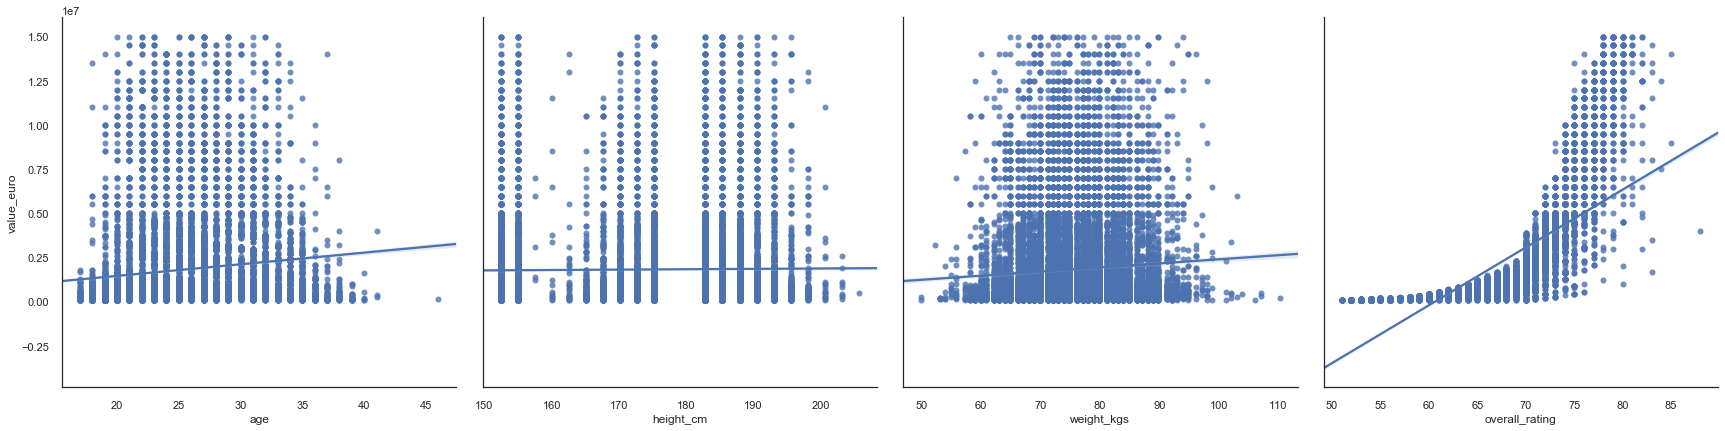

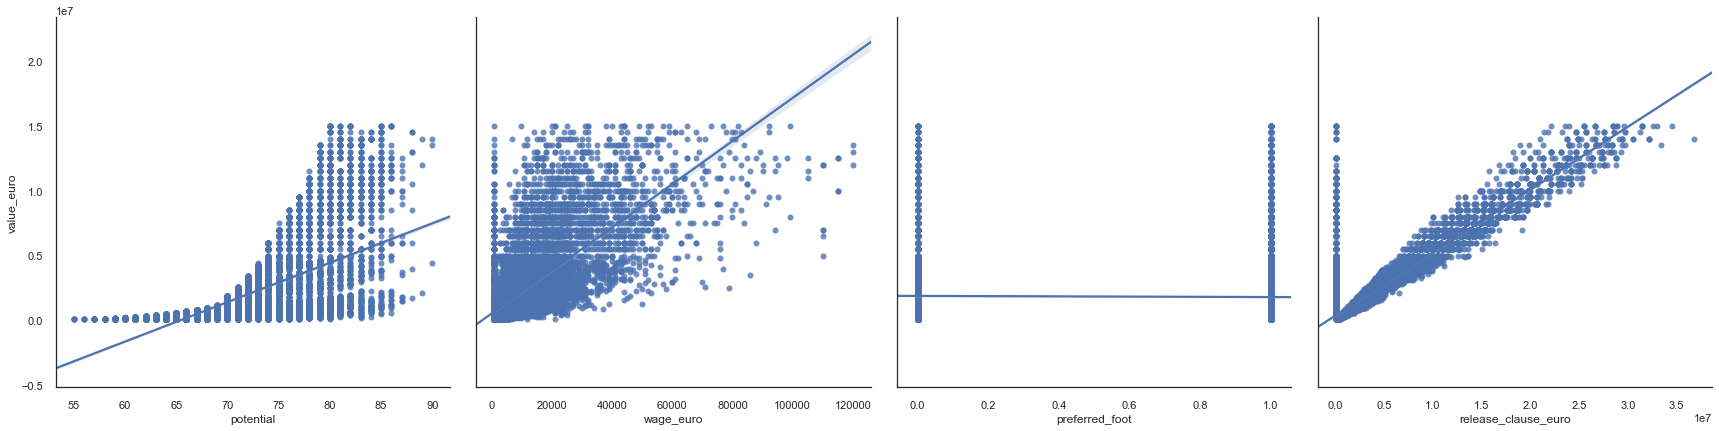

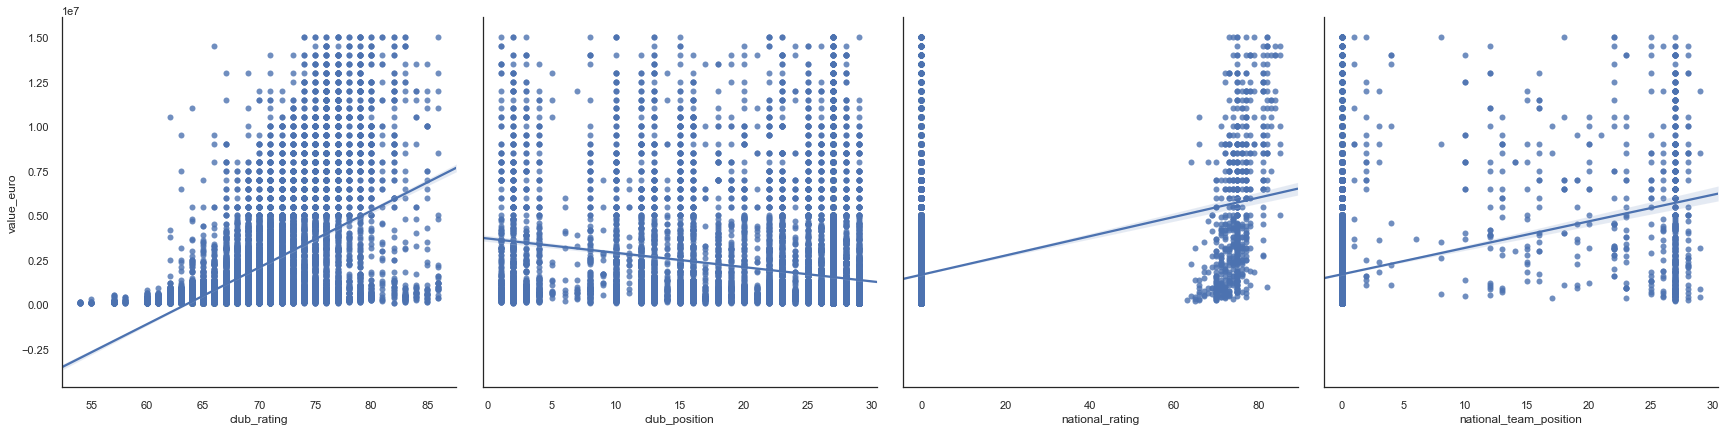

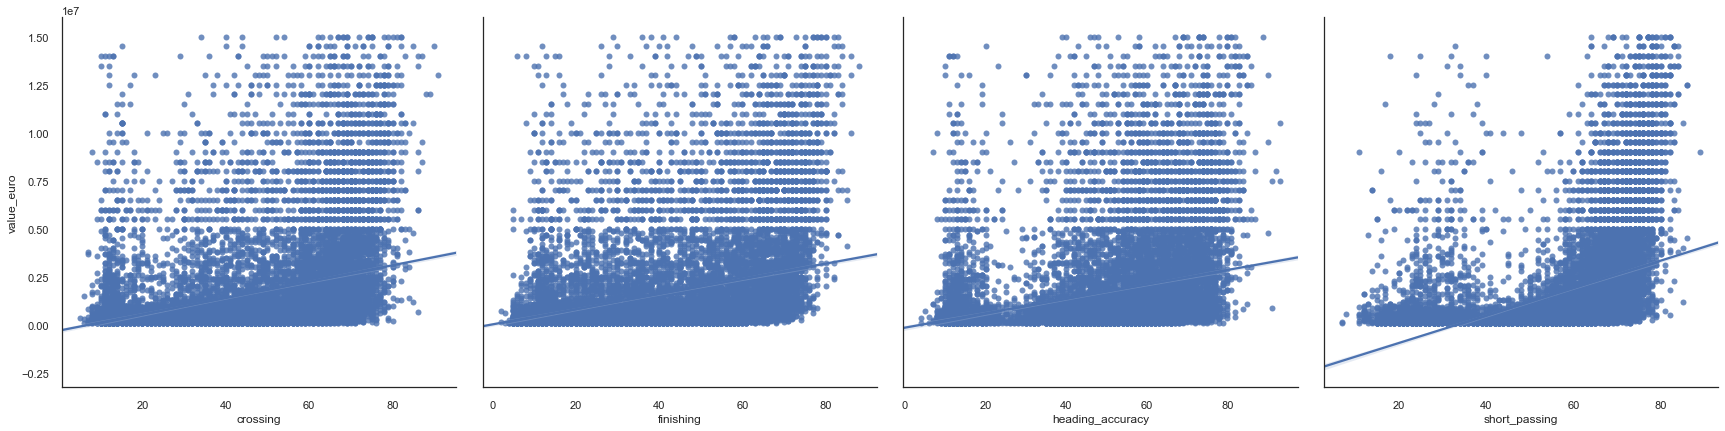

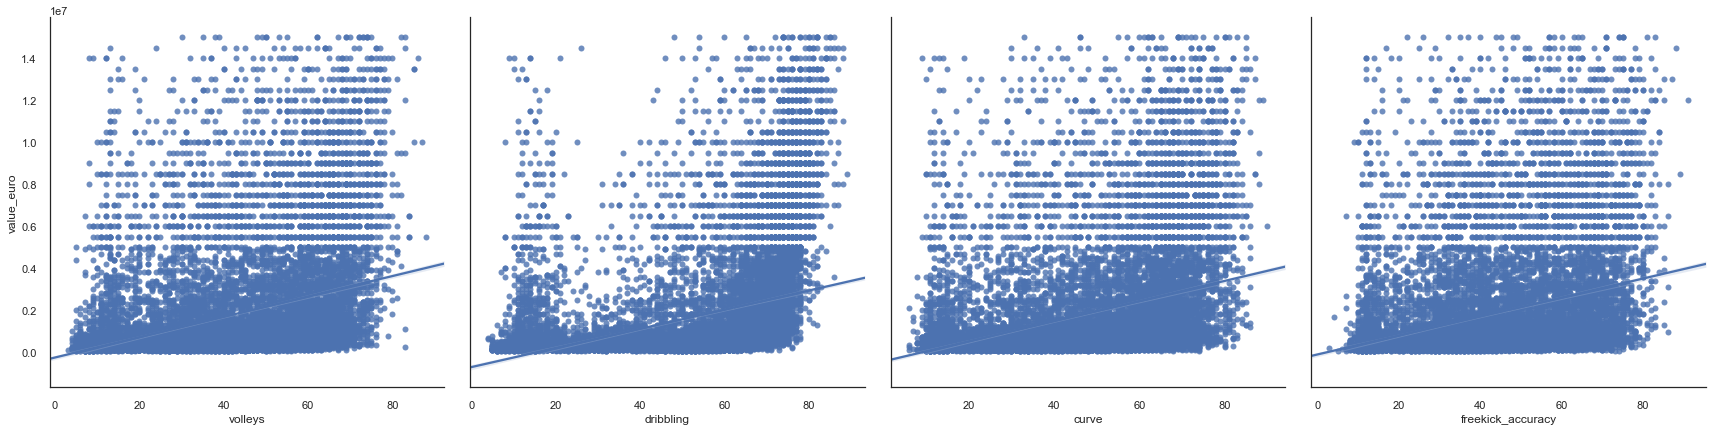

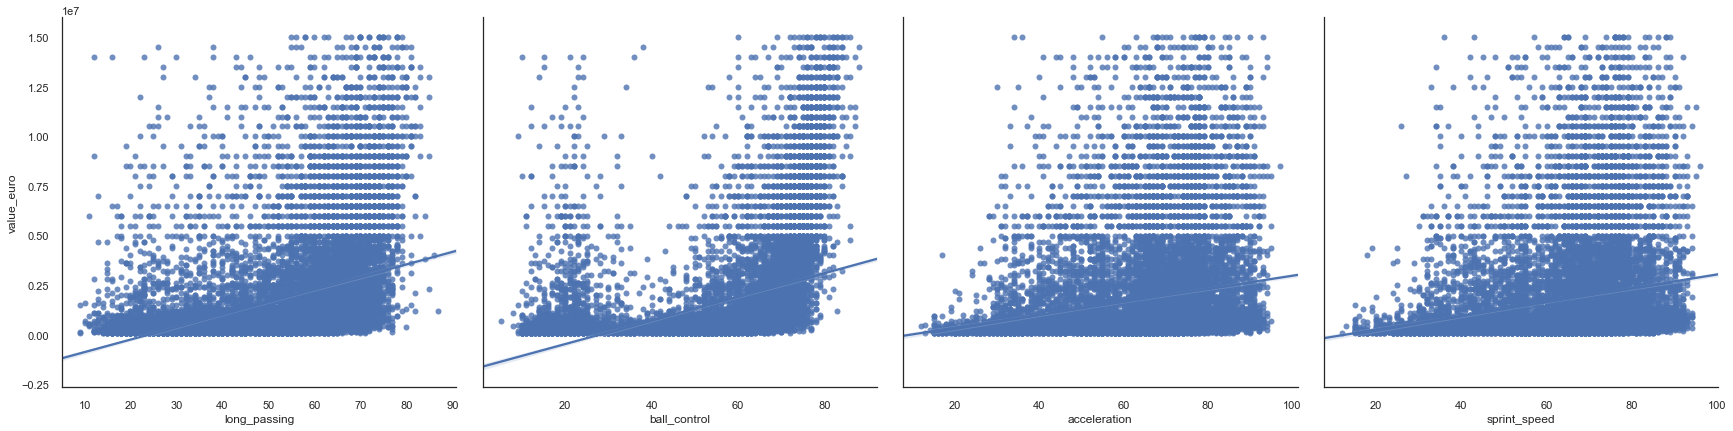

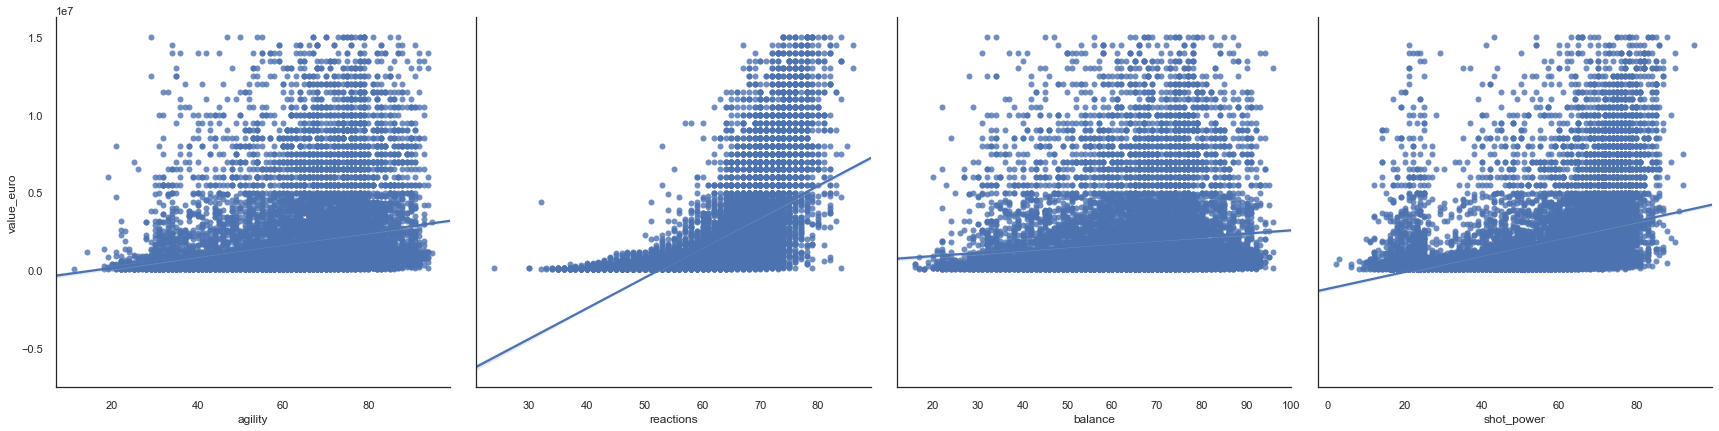

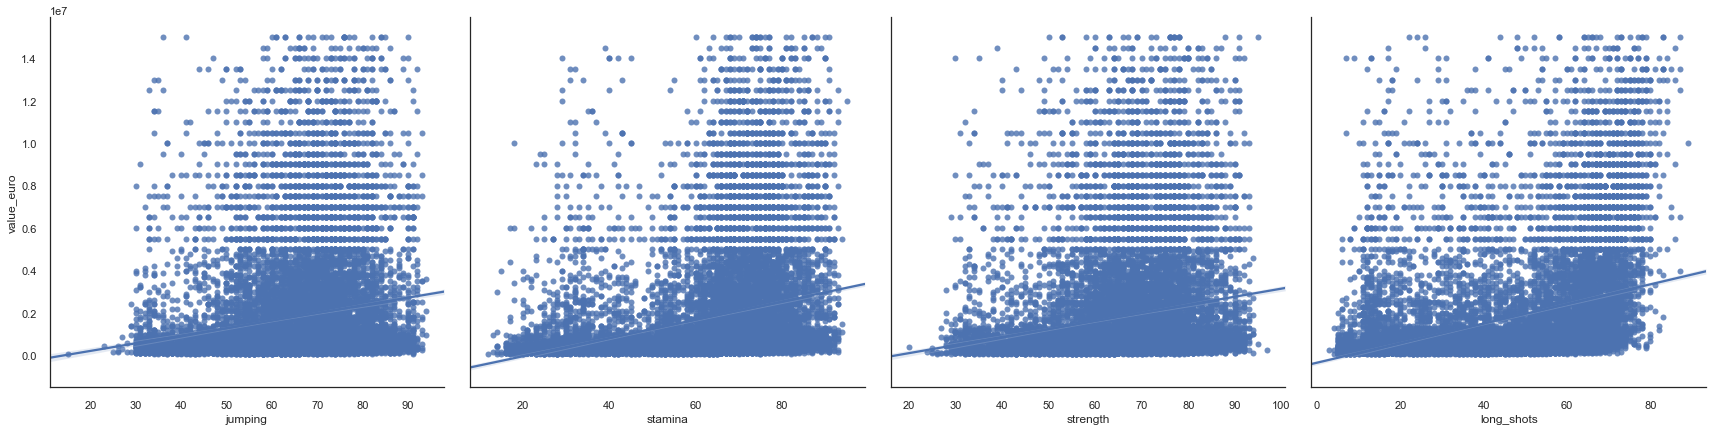

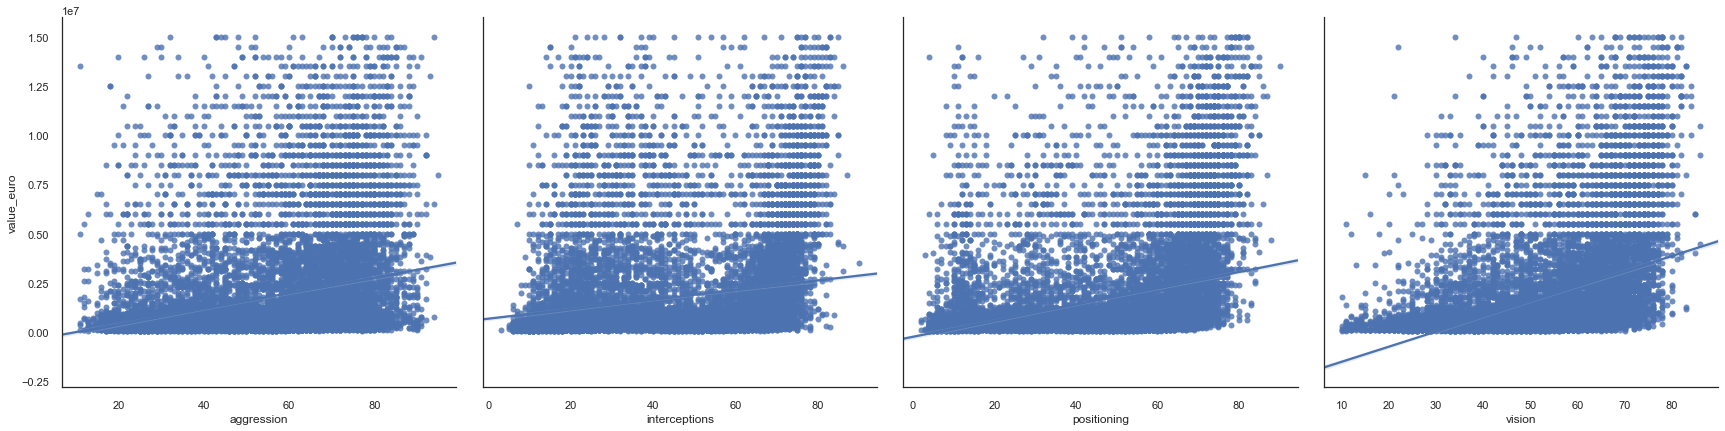

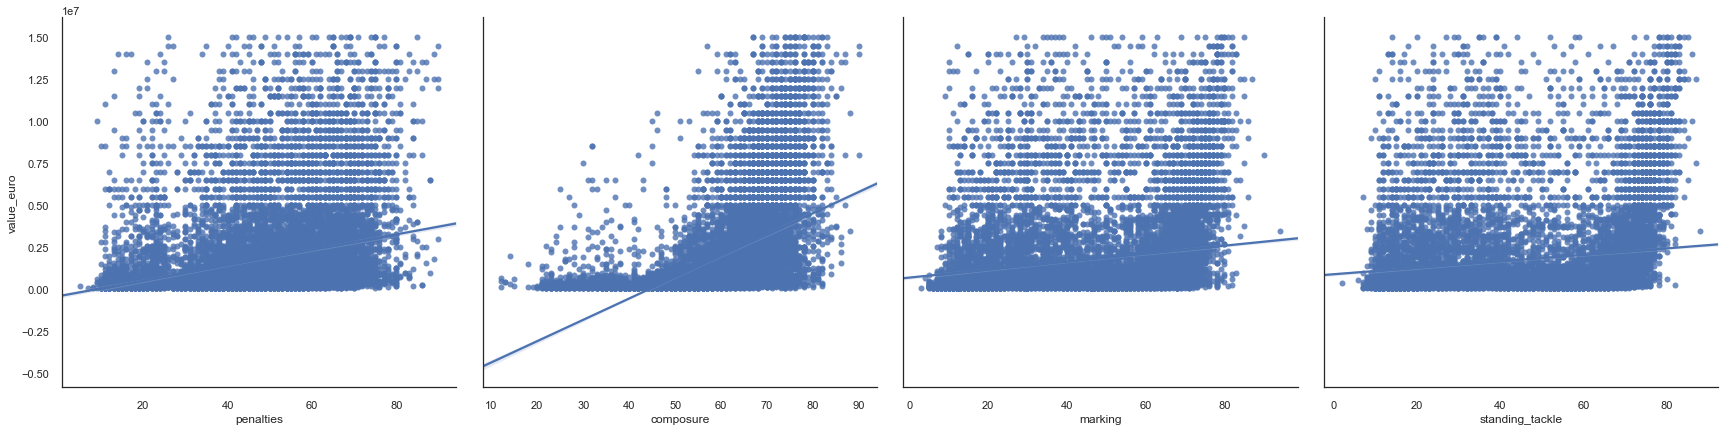

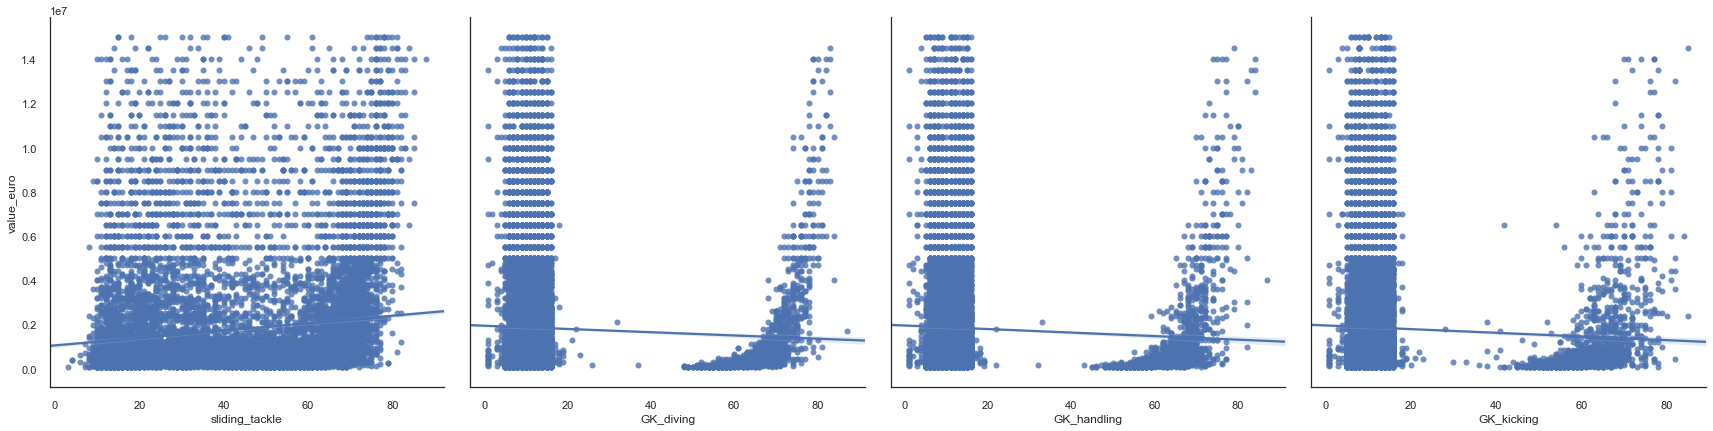

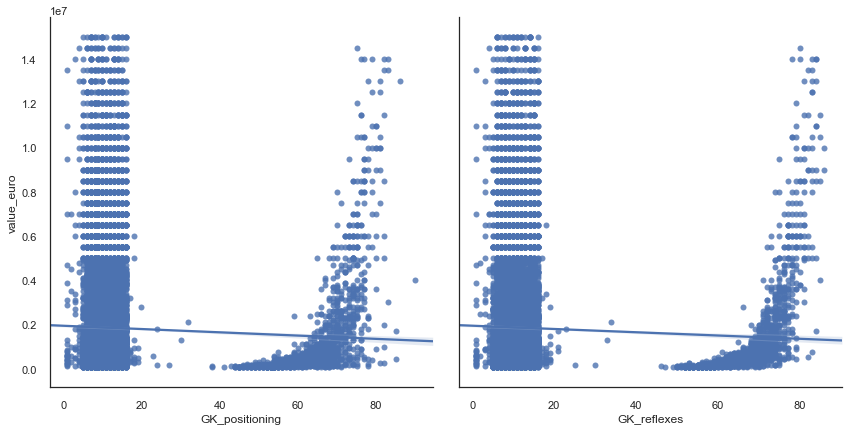

In [46]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['value_euro'],x_vars=i, kind="reg", height=6)

# <span id="7"></span> Checking for Feature Correlation
#### [Return Contents](#0)
<hr/>

In [ ]:
corr = df.corr

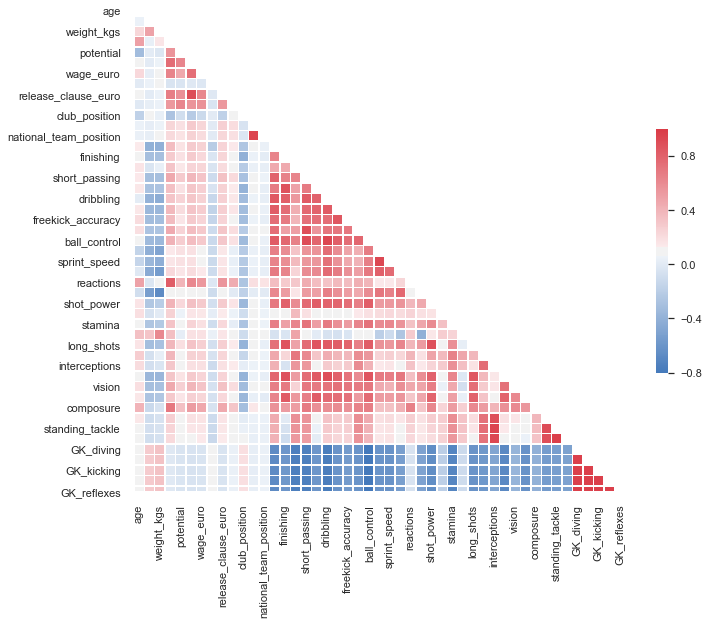

In [157]:
def CorrMtx(df, dropDuplicates = True):
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(corr, dropDuplicates = True)

In [158]:
corr

age  height_cm  weight_kgs  overall_rating  \
age                     1.000000   0.049838    0.226949        0.495486   
height_cm               0.049838   1.000000    0.491692        0.038037   
weight_kgs              0.226949   0.491692    1.000000        0.159726   
overall_rating          0.495486   0.038037    0.159726        1.000000   
potential              -0.318880   0.011873   -0.023173        0.557055   
value_euro              0.113762   0.011228    0.061307        0.750368   
wage_euro               0.218830   0.023896    0.085505        0.638179   
preferred_foot          0.006052   0.049293    0.073220       -0.036517   
release_clause_euro     0.098508   0.010247    0.051462        0.666618   
club_rating            -0.003542   0.030774    0.055793        0.538763   
club_position          -0.171383   0.079460    0.041042       -0.270268   
national_rating         0.049740   0.021764    0.059794        0.237390   
national_team_position  0.048246   0.032710    0.063540        0.216911   
crossing                0.138309  -0.395796   -0.402805        0.352693   
finishing               0.074622  -0.299348   -0.299505        0.286312   
heading_accuracy        0.161786  -0.033863    0.038831        0.318710   
short_passing           0.140817  -0.298350   -0.302007        0.456691   
volleys                 0.151654  -0.281867   -0.268051        0.344073   
dribbling               0.016129  -0.390132   -0.424362        0.322973   
curve                   0.154437  -0.350948   -0.354256        0.377660   
freekick_accuracy       0.204937  -0.317228   -0.308539        0.360345   
long_passing            0.191117  -0.269668   -0.267972        0.446959   
ball_control            0.092278  -0.337108   -0.350600        0.409089   
acceleration           -0.154246  -0.412542   -0.489464        0.141922   
sprint_speed           -0.147383  -0.357548   -0.421955        0.155210   
agility                -0.012353  -0.446345   -0.543700        0.219236   
reactions               0.487912  -0.023634    0.084770        0.829870   
balance                -0.083337  -0.534362   -0.668650        0.071378   
shot_power              0.165268  -0.240220   -0.198994        0.403528   
jumping                 0.190760  -0.052446    0.004965        0.254556   
stamina                 0.116210  -0.254393   -0.229760        0.324599   
strength                0.340330   0.322840    0.616740        0.347956   
long_shots              0.168331  -0.309960   -0.283487        0.382973   
aggression              0.274728  -0.069852    0.029431        0.381482   
interceptions           0.206357  -0.075752   -0.028627        0.307741   
positioning             0.091655  -0.358288   -0.361201        0.312213   
vision                  0.194306  -0.297524   -0.295745        0.452838   
penalties               0.151961  -0.271411   -0.252952        0.301793   
composure               0.403141  -0.119387   -0.049719        0.691230   
marking                 0.151597  -0.086526   -0.052219        0.272834   
standing_tackle         0.125775  -0.077557   -0.049678        0.239310   
sliding_tackle          0.110199  -0.082971   -0.060404        0.214838   
GK_diving               0.090840   0.288260    0.335225       -0.009272   
GK_handling             0.093444   0.288464    0.334297       -0.009353   
GK_kicking              0.094134   0.284323    0.333536       -0.011424   
GK_positioning          0.102552   0.288701    0.336607       -0.000914   
GK_reflexes             0.092596   0.289733    0.336022       -0.008039   

                        potential  value_euro  wage_euro  preferred_foot  \
age                     -0.318880    0.113762   0.218830        0.006052   
height_cm                0.011873    0.011228   0.023896        0.049293   
weight_kgs              -0.023173    0.061307   0.085505        0.073220   
overall_rating           0.557055    0.750368   0.638179       -0.036517   
potential                1.000000    0.631890   

# <span id="8"></span> Recording Correlations
#### [Return Contents](#0)
<hr/>

# Hypothesis Tests


Is there is a difference in the value between right footed and left footed players?

***Null Hypothesis***: there is not a statistically significant difference between the value of right and left footed players.

***Alternative Hypothesis***: there is a statistically significant difference between the value of right and left footed players.

We used a two-sample, two-tailed independent T-test to determine if there is or is not a difference between the value of the two groups.

We started by determining the sample size requirements to achieve an effect size of 0.8 and a power of 0.8 with an alpha value of 0.025.

In [135]:
from statsmodels.stats.power import TTestIndPower
effect_size = 0.8
alpha = 0.025 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)
sample_size

30.994809182633027

According to these calculations, we need a sample size of at least 31 observations to achieve our ideal statistical power.  Fortunately, we have 17699 observations in our data set so we will be able to meet this requirement.

In [137]:
from scipy.stats import ttest_ind
foot_df = df[['value_euro','preferred_foot']]
left = foot_df[foot_df['preferred_foot']==0]
right = foot_df[foot_df['preferred_foot']==1]

t_score, pvalue = ttest_ind(left['value_euro'],right['value_euro'], equal_var= False)

print("P-value",float(pvalue))
print("t-Score",float(t_score))

alpha= 0.025
if pvalue<alpha:
    print("reject null hypothesis")
else:
    print("fail to reject the null hypothesis")

P-value 0.02806382089903773
t-Score 2.1968892475632797
fail to reject the null hypothesis


Based on the results of this two-tailed t-test, we determined that there isn't a statistically significant difference between the value of right and left footed players.  The average value of left footed players is higher than the average value of right footed players, but the difference is not large enough.

In [129]:
df[df['preferred_foot'] == 0].max()

name                        Óscar Whalley
age                                    40
height_cm                      203.200000
weight_kgs                      98.900000
nationality                      Zimbabwe
overall_rating                         94
potential                              94
value_euro               110500000.000000
wage_euro                   565000.000000
preferred_foot                          0
release_clause_euro      226500000.000000
club_team                   Śląsk Wrocław
club_rating                     86.000000
club_position                          29
national_rating                 85.000000
national_team_position                 29
crossing                               90
finishing                              95
heading_accuracy                       91
short_passing                          93
volleys                                90
dribbling                              97
curve                                  93
freekick_accuracy                 

In [124]:
pd.set_option('float_format', '{:f}'.format)
df[df['preferred_foot'] == 0].describe()

age   height_cm  weight_kgs  overall_rating   potential  \
count 4120.000000 4120.000000 4120.000000     4120.000000 4120.000000   
mean    25.508738  173.673733   74.362354       66.818932   71.899757   
std      4.563854   13.688113    6.901427        6.583671    6.093302   
min     17.000000  152.400000   49.900000       47.000000   53.000000   
25%     22.000000  154.940000   69.900000       63.000000   68.000000   
50%     25.000000  175.260000   73.900000       67.000000   72.000000   
75%     29.000000  185.420000   78.900000       71.000000   76.000000   
max     40.000000  203.200000   98.900000       94.000000   94.000000   

            value_euro     wage_euro  preferred_foot  release_clause_euro  \
count      4120.000000   4120.000000     4120.000000          4120.000000   
mean    2656160.194175  10574.029126        0.000000       4538900.485437   
std     5990822.703542  23509.098109        0.000000      11576506.688979   
min       10000.000000   1000.000000        0.000000             0.000000   
25%      400000.000000   2000.000000        0.000000        445500.000000   
50%      775000.000000   4000.000000        0.000000       1100000.000000   
75%     2400000.000000  10000.000000        0.000000       3300000.000000   
max   110500000.000000 565000.000000        0.000000     226500000.000000   

       club_rating  club_position  national_rating  national_team_position  \
count  4120.000000    4120.000000      4120.000000             4120.000000   
mean     69.719903      23.305340         3.763592                1.053641   
std       5.142088       6.764335        16.612369                4.935396   
min      54.000000       1.000000         0.000000                0.000000   
25%      66.000000      22.000000         0.000000                0.000000   
50%      69.000000      27.000000         0.000000                0.000000   
75%      73.000000      27.000000         0.000000                0.000000   
max      86.000000      29.000000        85.000000               29.000000   

         crossing   finishing  heading_accuracy  short_passing     volleys  \
count 4120.000000 4120.000000       4120.000000    4120.000000 4120.000000   
mean    56.648301   46.904612         53.563835      61.392961   44.490291   
std     16.188149   17.532722         14.390736      12.280852   16.251555   
min      8.000000    5.000000          7.000000      11.000000    4.000000   
25%     49.000000   33.000000         46.000000      57.000000   32.000000   
50%     61.000000   49.000000         55.000000      64.000000   45.000000   
75%     67.000000   61.000000         63.000000      69.000000   57.000000   
max     90.000000   95.000000         91.000000      93.000000   90.000000   

        dribbling       curve  freekick_accuracy  long_passing  ball_control  \
count 4120.000000 4120.000000        4120.000000   4120.000000   4120.000000   
mean    59.933981   52.534951          47.483738     55.702427     61.874029   
std     15.520664   17.476770          17.354458     13.526387     13.444622   
min      6.000000    6.000000           3.000000     10.000000      8.000000   
25%     55.000000   40.000000          34.000000     48.000000     58.000000   
50%     63.000000   55.000000          46.000000     58.000000     64.000000   
75%     70.000000   66.000000          62.000000     65.000000     70.000000   
max     97.000000   93.000000          94.000000     89.000000     96.000000   

       acceleration  sprint_speed     agility   reactions     balance  \
count   4120.000000   4120.000000 4120.000000 4120.000000 4120.000000   
mean      67.910437     67.915777   66.299515   62.248058   66.330825   
std       13.019696     12.713549   13.396782    8.781208   13.320667   
min       15.000000     15.000000   19.000000   32.000000   16.000000   
25%       63.000000     63.000000   59.000000   57.000000   59.000000   
50%       70.000000     70.000000   68.000000   63.000000   68.000000   
75%       76.000000     

In [125]:
pd.set_option('float_format', '{:f}'.format)
df[df['preferred_foot'] == 1].describe()

age    height_cm   weight_kgs  overall_rating    potential  \
count 13579.000000 13579.000000 13579.000000    13579.000000 13579.000000   
mean     25.541056   175.311627    75.571750       66.045659    71.313131   
std       4.736758    14.118489     7.117503        7.079352     6.140800   
min      17.000000   152.400000    49.900000       47.000000    50.000000   
25%      22.000000   162.560000    69.900000       62.000000    67.000000   
50%      25.000000   182.880000    74.800000       66.000000    71.000000   
75%      29.000000   185.420000    79.800000       71.000000    75.000000   
max      46.000000   205.740000   110.200000       94.000000    95.000000   

            value_euro     wage_euro  preferred_foot  release_clause_euro  \
count     13579.000000  13579.000000    13579.000000         13579.000000   
mean    2425613.079019   9702.260844        1.000000       4109354.149790   
std     5590695.020055  21518.617727        0.000000      10624488.372186   
min       10000.000000   1000.000000        1.000000             0.000000   
25%      300000.000000   1000.000000        1.000000        365500.000000   
50%      675000.000000   3000.000000        1.000000        961000.000000   
75%     2000000.000000   9000.000000        1.000000       2800000.000000   
max   108000000.000000 455000.000000        1.000000     199800000.000000   

       club_rating  club_position  national_rating  national_team_position  \
count 13579.000000   13579.000000     13579.000000            13579.000000   
mean     69.237646      23.461963         3.676191                1.046616   
std       5.073376       7.406893        16.363468                4.967856   
min      54.000000       1.000000         0.000000                0.000000   
25%      65.000000      23.000000         0.000000                0.000000   
50%      69.000000      27.000000         0.000000                0.000000   
75%      72.000000      27.000000         0.000000                0.000000   
max      86.000000      29.000000        85.000000               29.000000   

          crossing    finishing  heading_accuracy  short_passing      volleys  \
count 13579.000000 13579.000000      13579.000000   13579.000000 13579.000000   
mean     47.618013    44.917520         51.727815      57.739009    42.250534   
std      18.598552    20.191489         18.316307      15.423642    18.197315   
min       5.000000     2.000000          4.000000       7.000000     3.000000   
25%      35.000000    28.000000         44.000000      52.000000    29.000000   
50%      52.000000    48.000000         56.000000      62.000000    43.000000   
75%      62.000000    62.000000         65.000000      68.000000    56.000000   
max      93.000000    94.000000         94.000000      93.000000    90.000000   

         dribbling        curve  freekick_accuracy  long_passing  \
count 13579.000000 13579.000000       13579.000000  13579.000000   
mean     53.920539    45.503572          41.241108     51.751749   
std      19.815304    18.518546          17.361727     15.806516   
min       4.000000     6.000000           4.000000      9.000000   
25%      46.000000    32.000000          29.000000     41.000000   
50%      60.000000    47.000000          40.000000     55.000000   
75%      67.000000    60.000000          54.000000     64.000000   
max      96.000000    94.000000          93.000000     93.000000   

       ball_control  acceleration  sprint_speed      agility    reactions  \
count  13579.000000  13579.000000  13579.000000 13579.000000 13579.000000   
mean      57.167980     63.735400     63.882097    62.527948    61.665292   
std       17.601784     15.424671     15.158344    15.090624     9.176137   
min        5.000000     12.000000     12.000000    11.000000    24.000000   
25%       52.000000     55.000000     55.000000    54.000000    55.000000   
50%       62.000000     67.000000     67.000000    65.000000    62.000000   
75%       69.000000     75.000000     74.0

In [126]:
df[df['value_euro'] == 108000000.00]

name  age  height_cm  weight_kgs nationality  overall_rating  \
id                                                                          
190871  Neymar Jr   27 175.260000   68.000000      Brazil              92   

        potential       value_euro     wage_euro  preferred_foot  \
id                                                                 
190871         92 108000000.000000 290000.000000               1   

        release_clause_euro            club_team  club_rating  club_position  \
id                                                                             
190871     199800000.000000  Paris Saint-Germain    84.000000              9   

       national_team  national_rating  national_team_position  crossing  \
id                                                                        
190871        Brazil        81.000000                       4        83   

        finishing  heading_accuracy  short_passing  volleys  dribbling  curve  \
id                                                                              
190871         87                62             84       84         96     88   

        freekick_accuracy  long_passing  ball_control  acceleration  \
id                                                                    
190871                 87            80            95            94   

        sprint_speed  agility  reactions  balance  shot_power  jumping  \
id                                                                       
190871            90       96         94       84          80       61   

        stamina  strength  long_shots  aggression  interceptions  positioning  \
id                                                                              
190871       81        49          82          56             36           89   

        vision  penalties  composure  marking  standing_tackle  \
id                                                               
190871      88         81         94       27               24   

        sliding_tackle  GK_diving  GK_handling  GK_kicking  GK_positioning  \
id                                                                           
190871              33          9            9          15              15   

        GK_reflexes  
id                   
190871           11

In [119]:
left_foot_val = float(2.656160e+06)

In [120]:
left_foot_val

2656160.0

In [121]:
right_foot_val = float(2.425613e+06)
right_foot_val

2425613.0

In [134]:
df[df['preferred_foot'] == 1].mean()

age                           25.541056
height_cm                    175.311627
weight_kgs                    75.571750
overall_rating                66.045659
potential                     71.313131
value_euro               2425613.079019
wage_euro                   9702.260844
preferred_foot                 1.000000
release_clause_euro      4109354.149790
club_rating                   69.237646
club_position                 23.461963
national_rating                3.676191
national_team_position         1.046616
crossing                      47.618013
finishing                     44.917520
heading_accuracy              51.727815
short_passing                 57.739009
volleys                       42.250534
dribbling                     53.920539
curve                         45.503572
freekick_accuracy             41.241108
long_passing                  51.751749
ball_control                  57.167980
acceleration                  63.735400
sprint_speed                  63.882097


In [ ]:
fig, ax = plt.subplots() # Plot a bar-chart of gold medals as a function of country
ax.bar(['CT','NJ','NY'],grp_states['PHYSHLTH'].mean()) # Set the x-axis tick labels to the country names
ax.set_xlabel('States') # Set the y-axis label
ax.set_ylabel('Days')
ax.set_title('Sick Days')
plt.show()

In [ ]:
print('\nPlayer Values by Preferred Foot: \n')
print(round(df['preferred_foot'][df[''] == 'Yes'].value_counts()/main_df['MaritalStatus'].value_counts()*100,2))
(main_df['MaritalStatus'][main_df['Attrition'] == 'Yes'].value_counts()/main_df['MaritalStatus'].value_counts()*100).plot.bar(color = 'blue')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


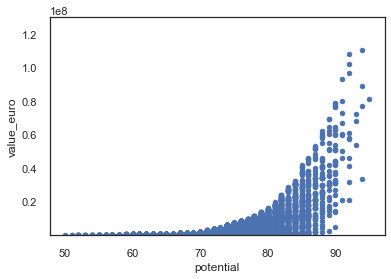

In [142]:
var = 'potential'
data = pd.concat([df['value_euro'], df[var]], axis=1)
data.plot.scatter(x=var, y='value_euro', ylim=(3,130000000));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


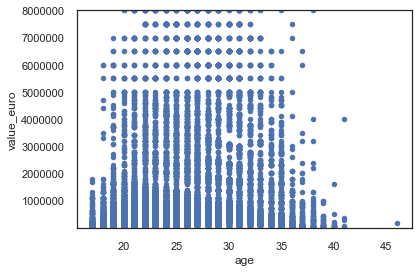

In [46]:
var = 'age'
data = pd.concat([df['value_euro'], df[var]], axis=1)
data.plot.scatter(x=var, y='value_euro', ylim=(3,8000000));

In [43]:
df['value_euro'].plot

In [143]:
poten_df = df.loc[:,('potential', 'preferred_foot')]

In [144]:
top_perform 


potential  preferred_foot
id                               
158023         94               0
190460         89               1
195864         91               1
198219         88               1
201024         91               1
...           ...             ...
204322         70               1
239762         67               0
235155         67               1
244883         71               1
247187         75               1

[17699 rows x 2 columns]

In [ ]:
poten_df = df.loc[:,('potential', 'preferred_foot')]

df2.groupby(df2[df2[‘popularity’] > 1000.0].index, inplace = True)

# Feature Engineering

We analyzed the features to identify new features we could engineer that might have a stronger influence on the model.

In [48]:
#attacking
df['attacking'] = df[['crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys']].mean(axis=1)

In [50]:
#skill
df['skill'] = df[['dribbling', 'curve', 'freekick_accuracy', 'long_passing', 'ball_control']].mean(axis=1)

In [54]:
#movement
df['movement'] = df[['acceleration', 'sprint_speed', 'agility', 'reactions', 'balance']].mean(axis=1)

In [56]:
#power
df['power'] = df[['shot_power', 'jumping', 'stamina', 'strength', 'long_shots']].mean(axis=1)

In [58]:
#mentality
df['mentality'] = df[['aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure']].mean(axis=1)

In [60]:
#defending
df['defending'] = df[['marking', 'standing_tackle', 'sliding_tackle']].mean(axis=1)

In [62]:
#goal_keeping
df['goal_keeping'] = df[['GK_diving', 'GK_handling',	'GK_kicking', 'GK_positioning',	'GK_reflexes']].mean(axis=1)

In [69]:
df[df['composure']*df['reactions']]

KeyError: "None of [Int64Index([7380, 5494, 5460, 6396, 5293, 4446, 5304, 6560, 6560, 5624,\n            ...\n            5740, 2793, 3120, 3520, 3286, 3528, 2600, 2256, 2809, 2430],\n           dtype='int64', length=16714)] are in the [columns]"

In [63]:
df

name  age  height_cm  weight_kgs   nationality  \
id                                                                   
41236     Z. Ibrahimović   37     195.58        94.8        Sweden   
230168  Raphaelito Anjos   31     190.50        84.8        Brazil   
230225    Juiano Mestres   35     154.94        82.1        Brazil   
183498         M. Parolo   34     182.88        74.8         Italy   
203890       S. Vrsaljko   27     154.94        76.2       Croatia   
...                  ...  ...        ...         ...           ...   
204322       R. McKenzie   25     175.26        74.8      Scotland   
239762         M. Sipľak   23     182.88        79.8      Slovakia   
235155        J. Bekkema   22     185.42        89.8   Netherlands   
244883        A. Al Yami   21     175.26        64.9  Saudi Arabia   
247187    Júnior Brumado   19     190.50        79.8        Brazil   

        overall_rating  potential  value_euro  wage_euro  preferred_foot  \
id                                                                         
41236               85         85  14000000.0    15000.0               1   
230168              82         82  14000000.0    32000.0               1   
230225              82         82   6500000.0    39000.0               1   
183498              82         82   9000000.0    59000.0               1   
203890              81         81  15000000.0    57000.0               1   
...                ...        ...         ...        ...             ...   
204322              67         70    975000.0     3000.0               1   
239762              59         67    190000.0     1000.0               0   
235155              59         67    170000.0     1000.0               1   
244883              59         71    280000.0     4000.0               1   
247187              59         75    325000.0     2000.0               1   

        release_clause_euro       club_team  club_rating  club_position  \
id                                                                        
41236            21000000.0       LA Galaxy         71.0              3   
230168           25200000.0          Grêmio         75.0             28   
230225           12400000.0        Cruzeiro         73.0             25   
183498           15300000.0           Lazio         80.0             20   
203890                  0.0           Inter         82.0             27   
...                     ...             ...          ...            ...   
204322            1800000.0      Kilmarnock         67.0             27   
239762             295000.0        Cracovia         65.0             22   
235155             289000.0   SC Heerenveen         69.0             29   
244883             532000.0        Al Hilal         74.0             29   
247187             626000.0  FC Midtjylland         71.0             29   

       national_team  national_rating  national_team_position  crossing  \
id                                                                        
41236              0              0.0                       0        73   
230168        Brazil             81.0                      28        10   
230225        Brazil             81.0                      25        40   
183498             0              0.0                       0        70   
203890             0              0.0                       0        82   
...              ...              ...                     ...       ...   
204322             0              0.0                       0        57   
239762             0              0.0                       0        50   
235155             0              0.0                       0        11   
244883             0              0.0                       0        42   
247187             0              0.0                       0        32   

        finishing  heading_accuracy  short_passing  volleys  dribbling  curve  \
id                                                                              
41236 

In [68]:
df.corr()

age  height_cm  weight_kgs  overall_rating  \
age                     1.000000   0.049838    0.226949        0.495486   
height_cm               0.049838   1.000000    0.491692        0.038037   
weight_kgs              0.226949   0.491692    1.000000        0.159726   
overall_rating          0.495486   0.038037    0.159726        1.000000   
potential              -0.318880   0.011873   -0.023173        0.557055   
value_euro              0.113762   0.011228    0.061307        0.750368   
wage_euro               0.218830   0.023896    0.085505        0.638179   
preferred_foot          0.006052   0.049293    0.073220       -0.036517   
release_clause_euro     0.098508   0.010247    0.051462        0.666618   
club_rating            -0.003542   0.030774    0.055793        0.538763   
club_position          -0.171383   0.079460    0.041042       -0.270268   
national_rating         0.049740   0.021764    0.059794        0.237390   
national_team_position  0.048246   0.032710    0.063540        0.216911   
crossing                0.138309  -0.395796   -0.402805        0.352693   
finishing               0.074622  -0.299348   -0.299505        0.286312   
heading_accuracy        0.161786  -0.033863    0.038831        0.318710   
short_passing           0.140817  -0.298350   -0.302007        0.456691   
volleys                 0.151654  -0.281867   -0.268051        0.344073   
dribbling               0.016129  -0.390132   -0.424362        0.322973   
curve                   0.154437  -0.350948   -0.354256        0.377660   
freekick_accuracy       0.204937  -0.317228   -0.308539        0.360345   
long_passing            0.191117  -0.269668   -0.267972        0.446959   
ball_control            0.092278  -0.337108   -0.350600        0.409089   
acceleration           -0.154246  -0.412542   -0.489464        0.141922   
sprint_speed           -0.147383  -0.357548   -0.421955        0.155210   
agility                -0.012353  -0.446345   -0.543700        0.219236   
reactions               0.487912  -0.023634    0.084770        0.829870   
balance                -0.083337  -0.534362   -0.668650        0.071378   
shot_power              0.165268  -0.240220   -0.198994        0.403528   
jumping                 0.190760  -0.052446    0.004965        0.254556   
stamina                 0.116210  -0.254393   -0.229760        0.324599   
strength                0.340330   0.322840    0.616740        0.347956   
long_shots              0.168331  -0.309960   -0.283487        0.382973   
aggression              0.274728  -0.069852    0.029431        0.381482   
interceptions           0.206357  -0.075752   -0.028627        0.307741   
positioning             0.091655  -0.358288   -0.361201        0.312213   
vision                  0.194306  -0.297524   -0.295745        0.452838   
penalties               0.151961  -0.271411   -0.252952        0.301793   
composure               0.403141  -0.119387   -0.049719        0.691230   
marking                 0.151597  -0.086526   -0.052219        0.272834   
standing_tackle         0.125775  -0.077557   -0.049678        0.239310   
sliding_tackle          0.110199  -0.082971   -0.060404        0.214838   
GK_diving               0.090840   0.288260    0.335225       -0.009272   
GK_handling             0.093444   0.288464    0.334297       -0.009353   
GK_kicking              0.094134   0.284323    0.333536       -0.011424   
GK_positioning          0.102552   0.288701    0.336607       -0.000914   
GK_reflexes             0.092596   0.289733    0.336022       -0.008039   
attacking               0.156838  -0.312867   -0.294843        0.412248   
skill                   0.141995  -0.368927   -0.378451        0.418113   
movement               -0.030067  -0.465417   -0.546926        0.283598   
power                   0.264571  -0.194012   -0.084155        0.490266   
mentality               0.282990  -0.269489   -0.217617        0.523928   
defending               0.131832  -0.084237   -0.05543

In [129]:
pd.set_option('display.max_rows', None)
abs(df.corr()) > .65

age  height_cm  weight_kgs  overall_rating  \
age                             True      False       False           False   
height_cm                      False       True       False           False   
weight_kgs                     False      False        True           False   
overall_rating                 False      False       False            True   
potential                      False      False       False           False   
value_euro                     False      False       False            True   
wage_euro                      False      False       False           False   
preferred_foot                 False      False       False           False   
release_clause_euro            False      False       False            True   
club_rating                    False      False       False           False   
club_position                  False      False       False           False   
national_rating                False      False       False           False   
national_team_position         False      False       False           False   
crossing                       False      False       False           False   
finishing                      False      False       False           False   
heading_accuracy               False      False       False           False   
short_passing                  False      False       False           False   
volleys                        False      False       False           False   
dribbling                      False      False       False           False   
curve                          False      False       False           False   
freekick_accuracy              False      False       False           False   
long_passing                   False      False       False           False   
ball_control                   False      False       False           False   
acceleration                   False      False       False           False   
sprint_speed                   False      False       False           False   
agility                        False      False       False           False   
reactions                      False      False       False            True   
balance                        False      False        True           False   
shot_power                     False      False       False           False   
jumping                        False      False       False           False   
stamina                        False      False       False           False   
strength                       False      False       False           False   
long_shots                     False      False       False           False   
aggression                     False      False       False           False   
interceptions                  False      False       False           False   
positioning                    False      False       False           False   
vision                         False      False       False           False   
penalties                      False      False       False           False   
composure                      False      False       False            True   
marking                        False      False       False           False   
standing_tackle                False      False       False           False   
sliding_tackle                 False      False       False           False   
GK_diving                      False      False       False           False   
GK_handling                    False      False       False           False   
GK_kicking                     False      False       False           False   
GK_positioning                 False      False       False           False   
GK_reflexes                    False      False       False           False   
attacking                      False      False       False           False   
skill                          False      False       False           False   
movement                       False      False       False           False   
powe

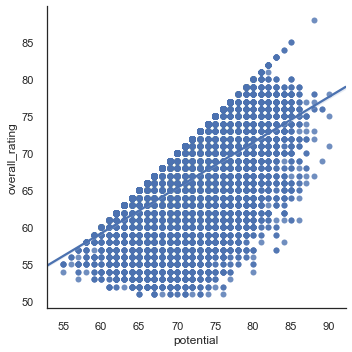

In [70]:
sns.lmplot(x = 'potential', y = 'overall_rating', data = df)
plt.show()

# Standardization

In [72]:
df.columns

Index(['name', 'age', 'height_cm', 'weight_kgs', 'nationality',
       'overall_rating', 'potential', 'value_euro', 'wage_euro',
       'preferred_foot', 'release_clause_euro', 'club_team', 'club_rating',
       'club_position', 'national_team', 'national_rating',
       'national_team_position', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'GK_diving', 'GK_handling', 'GK_kicking',
       'GK_positioning', 'GK_reflexes', 'attacking', 'skill', 'movement',
       'power', 'mentality', 'defending', 'goal_keeping'],
      dtype='object')

In [73]:
all_features = ['age', 'height_cm', 'weight_kgs', 'overall_rating', 'potential', 'preferred_foot', 'club_rating', 'club_position', 'national_rating',
       'national_team_position', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'GK_diving', 'GK_handling', 'GK_kicking',
       'GK_positioning', 'GK_reflexes', 'attacking', 'skill', 'movement',
       'power', 'mentality', 'defending', 'goal_keeping']

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [75]:
subset_scaled = []
for var in all_features:
    new_col = var +"_scaled"
    df[new_col] = scaler.fit_transform(df[[var]])
    subset_scaled.append(new_col)

In [76]:
df

name  age  height_cm  weight_kgs   nationality  \
id                                                                   
41236     Z. Ibrahimović   37     195.58        94.8        Sweden   
230168  Raphaelito Anjos   31     190.50        84.8        Brazil   
230225    Juiano Mestres   35     154.94        82.1        Brazil   
183498         M. Parolo   34     182.88        74.8         Italy   
203890       S. Vrsaljko   27     154.94        76.2       Croatia   
...                  ...  ...        ...         ...           ...   
204322       R. McKenzie   25     175.26        74.8      Scotland   
239762         M. Sipľak   23     182.88        79.8      Slovakia   
235155        J. Bekkema   22     185.42        89.8   Netherlands   
244883        A. Al Yami   21     175.26        64.9  Saudi Arabia   
247187    Júnior Brumado   19     190.50        79.8        Brazil   

        overall_rating  potential  value_euro  wage_euro  preferred_foot  \
id                                                                         
41236               85         85  14000000.0    15000.0               1   
230168              82         82  14000000.0    32000.0               1   
230225              82         82   6500000.0    39000.0               1   
183498              82         82   9000000.0    59000.0               1   
203890              81         81  15000000.0    57000.0               1   
...                ...        ...         ...        ...             ...   
204322              67         70    975000.0     3000.0               1   
239762              59         67    190000.0     1000.0               0   
235155              59         67    170000.0     1000.0               1   
244883              59         71    280000.0     4000.0               1   
247187              59         75    325000.0     2000.0               1   

        release_clause_euro       club_team  club_rating  club_position  \
id                                                                        
41236            21000000.0       LA Galaxy         71.0              3   
230168           25200000.0          Grêmio         75.0             28   
230225           12400000.0        Cruzeiro         73.0             25   
183498           15300000.0           Lazio         80.0             20   
203890                  0.0           Inter         82.0             27   
...                     ...             ...          ...            ...   
204322            1800000.0      Kilmarnock         67.0             27   
239762             295000.0        Cracovia         65.0             22   
235155             289000.0   SC Heerenveen         69.0             29   
244883             532000.0        Al Hilal         74.0             29   
247187             626000.0  FC Midtjylland         71.0             29   

       national_team  national_rating  national_team_position  crossing  \
id                                                                        
41236              0              0.0                       0        73   
230168        Brazil             81.0                      28        10   
230225        Brazil             81.0                      25        40   
183498             0              0.0                       0        70   
203890             0              0.0                       0        82   
...              ...              ...                     ...       ...   
204322             0              0.0                       0        57   
239762             0              0.0                       0        50   
235155             0              0.0                       0        11   
244883             0              0.0                       0        42   
247187             0              0.0                       0        32   

        finishing  heading_accuracy  short_passing  volleys  dribbling  curve  \
id                                                                              
41236 

# Train, Validation, and Test Split

In [77]:
train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)

In [78]:
train_val,test_val = train_test_split(train_data,train_size = 0.8,random_state=3)

# OLS Models

In [227]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

In [238]:
del evaluate

# MLR_1: All Featues, Not Processed

In [240]:
features = ['age', 'height_cm', 'weight_kgs', 'overall_rating', 'potential', 'preferred_foot', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'GK_diving', 'GK_handling', 'GK_kicking',
       'GK_positioning', 'GK_reflexes', 'attacking', 'skill', 'movement',
       'power', 'mentality', 'defending', 'goal_keeping']

In [241]:
complex_model_2 = linear_model.LinearRegression()
complex_model_2.fit(train_data[features],train_data['value_euro'])

print('Intercept: {}'.format(complex_model_2.intercept_))
print('Coefficients: {}'.format(complex_model_2.coef_))

pred = complex_model_2.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['value_euro'],pred)),'.3f'))
rtrcm = float(format(complex_model_2.score(train_data[features],train_data['value_euro']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_2.score(train_data[features],train_data['value_euro']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_2.score(test_data[features],test_data['value_euro']),'.3f'))
artecm = float(format(adjustedR2(complex_model_2.score(test_data[features],test_data['value_euro']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(linear_model.LinearRegression(),train_data[features],train_data['value_euro'],cv=5).mean(),'.3f'))

r = evaluate.shape[0]
evaluate.loc[r] = ['MLR_1','all features, not processed',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluate.sort_values(by = '5-Fold Cross Validation', ascending=False,)

Intercept: -19944183.636227656
Coefficients: [-1.97110546e+05  1.64677630e+03  8.50014835e+03  3.80656155e+05
  1.06909279e+04  9.98114389e+04 -1.38268645e+15 -1.38268645e+15
 -1.38268645e+15 -1.38268645e+15 -1.38268645e+15  4.36413049e+14
  4.36413049e+14  4.36413049e+14  4.36413049e+14  4.36413049e+14
  1.37142420e+15  1.37142420e+15  1.37142420e+15  1.37142420e+15
  1.37142420e+15  7.81033062e+14  7.81033062e+14  7.81033062e+14
  7.81033062e+14  7.81033062e+14 -7.35118644e+14 -7.35118644e+14
 -7.35118644e+14 -7.35118644e+14 -7.35118644e+14 -7.35118644e+14
 -5.43877521e+15 -5.43877521e+15 -5.43877521e+15  4.48537817e+14
  4.48537817e+14  4.48537817e+14  4.48537817e+14  4.48537817e+14
  6.91343226e+15 -2.18206524e+15 -6.85712098e+15 -3.90516531e+15
  4.41071186e+15  1.63163256e+16 -2.24268908e+15]


Model                      Details  Root Mean Squared Error (RMSE)  \
0  MLR_1  all features, not processed                     1562209.347   

   R-squared (training)  Adjusted R-squared (training)  R-squared (test)  \
0                 0.662                          0.661              0.66   

   Adjusted R-squared (test)  5-Fold Cross Validation  
0                      0.656                    0.659

# MLR_2: All Features, Preprocessed

In [242]:
pd.set_option('display.max_columns', None)
list(df.columns)

['name',
 'age',
 'height_cm',
 'weight_kgs',
 'nationality',
 'overall_rating',
 'potential',
 'value_euro',
 'wage_euro',
 'preferred_foot',
 'release_clause_euro',
 'club_team',
 'club_rating',
 'club_position',
 'national_team',
 'national_rating',
 'national_team_position',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'freekick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'GK_diving',
 'GK_handling',
 'GK_kicking',
 'GK_positioning',
 'GK_reflexes',
 'attacking',
 'skill',
 'movement',
 'power',
 'mentality',
 'defending',
 'goal_keeping',
 'age_scaled',
 'height_cm_scaled',
 'weight_kgs_scaled',
 'overall_rating_scaled',
 'potential_scaled',
 'prefe

In [243]:
features = ['age_scaled',
 'height_cm_scaled',
 'weight_kgs_scaled',
 'overall_rating_scaled',
 'potential_scaled',
 'preferred_foot_scaled',
 'crossing_scaled',
 'finishing_scaled',
 'heading_accuracy_scaled',
 'short_passing_scaled',
 'volleys_scaled',
 'dribbling_scaled',
 'curve_scaled',
 'freekick_accuracy_scaled',
 'long_passing_scaled',
 'ball_control_scaled',
 'acceleration_scaled',
 'sprint_speed_scaled',
 'agility_scaled',
 'reactions_scaled',
 'balance_scaled',
 'shot_power_scaled',
 'jumping_scaled',
 'stamina_scaled',
 'strength_scaled',
 'long_shots_scaled',
 'aggression_scaled',
 'interceptions_scaled',
 'positioning_scaled',
 'vision_scaled',
 'penalties_scaled',
 'composure_scaled',
 'marking_scaled',
 'standing_tackle_scaled',
 'sliding_tackle_scaled',
 'GK_diving_scaled',
 'GK_handling_scaled',
 'GK_kicking_scaled',
 'GK_positioning_scaled',
 'GK_reflexes_scaled',
 'attacking_scaled',
 'skill_scaled',
 'movement_scaled',
 'power_scaled',
 'mentality_scaled',
 'defending_scaled',
 'goal_keeping_scaled']

In [244]:
complex_model_2 = linear_model.LinearRegression()
complex_model_2.fit(train_data[features],train_data['value_euro'])

print('Intercept: {}'.format(complex_model_2.intercept_))
print('Coefficients: {}'.format(complex_model_2.coef_))

pred = complex_model_2.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['value_euro'],pred)),'.3f'))
rtrcm = float(format(complex_model_2.score(train_data[features],train_data['value_euro']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_2.score(train_data[features],train_data['value_euro']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_2.score(test_data[features],test_data['value_euro']),'.3f'))
artecm = float(format(adjustedR2(complex_model_2.score(test_data[features],test_data['value_euro']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(linear_model.LinearRegression(),train_data[features],train_data['value_euro'],cv=5).mean(),'.3f'))

r = evaluate.shape[0]
evaluate.loc[r] = ['MLR_2','all features, preprocessed',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluate.sort_values(by = '5-Fold Cross Validation', ascending=False,)

Intercept: 1825735.0825223431
Coefficients: [-9.08933276e+05  2.33351470e+04  6.01425209e+04  2.32771268e+06
  5.97094018e+04  4.23186933e+04  4.23985585e+16  4.51117397e+16
  4.02087409e+16  3.34403610e+16  4.06578945e+16  4.72445016e+15
  4.61795311e+15  4.39733972e+15  3.82503073e+15  4.12359565e+15
  5.79993410e+16  5.68872713e+16  5.74056924e+16  3.31666251e+16
  5.54842990e+16 -3.50967288e+16 -2.42124245e+16 -3.22311493e+16
 -2.59527057e+16 -3.93652875e+16 -1.16489337e+17 -1.39534683e+17
 -1.29824254e+17 -9.28248937e+16 -1.04538504e+17 -7.44013792e+16
 -1.19662709e+17 -1.29710299e+17 -1.27554426e+17 -4.55453549e+16
 -4.34507137e+16 -4.24435908e+16 -4.38088089e+16 -4.62917174e+16
 -1.69669162e+17 -1.97338646e+16 -2.15553779e+17  1.11968551e+17
  4.82746241e+17  3.67977795e+17  2.18736113e+17]


Model                      Details  Root Mean Squared Error (RMSE)  \
0  MLR_1  all features, not processed                     1562209.347   
1  MLR_2   all features, preprocessed                     1562208.121   

   R-squared (training)  Adjusted R-squared (training)  R-squared (test)  \
0                 0.662                          0.661              0.66   
1                 0.662                          0.661              0.66   

   Adjusted R-squared (test)  5-Fold Cross Validation  
0                      0.656                    0.659  
1                      0.656                    0.659

# MLR_3: Basic & Individual, Not Processed

In [245]:
features = ['age', 'overall_rating', 'potential', 'preferred_foot', 'short_passing', 'long_passing', 'ball_control', 'reactions', 'shot_power', 'vision', 'composure']

In [246]:
complex_model_2 = linear_model.LinearRegression()
complex_model_2.fit(train_data[features],train_data['value_euro'])

print('Intercept: {}'.format(complex_model_2.intercept_))
print('Coefficients: {}'.format(complex_model_2.coef_))

pred = complex_model_2.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['value_euro'],pred)),'.3f'))
rtrcm = float(format(complex_model_2.score(train_data[features],train_data['value_euro']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_2.score(train_data[features],train_data['value_euro']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_2.score(test_data[features],test_data['value_euro']),'.3f'))
artecm = float(format(adjustedR2(complex_model_2.score(test_data[features],test_data['value_euro']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(linear_model.LinearRegression(),train_data[features],train_data['value_euro'],cv=5).mean(),'.3f'))

r = evaluate.shape[0]
evaluate.loc[r] = ['MLR_3','basic & individual, not processed',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluate.sort_values(by = '5-Fold Cross Validation', ascending=False,)

Intercept: -20022612.651279103
Coefficients: [-186927.2594606   354820.84028156   19425.06620355  113151.28386125
   -4138.97235888   -3531.21532289   -6010.68472239   16131.37561086
    6086.57334383   12200.56445984    7828.99993431]


Model                            Details  Root Mean Squared Error (RMSE)  \
0  MLR_1        all features, not processed                     1562209.347   
1  MLR_2         all features, preprocessed                     1562208.121   
2  MLR_3  basic & individual, not processed                     1573193.418   

   R-squared (training)  Adjusted R-squared (training)  R-squared (test)  \
0                 0.662                          0.661             0.660   
1                 0.662                          0.661             0.660   
2                 0.657                          0.657             0.656   

   Adjusted R-squared (test)  5-Fold Cross Validation  
0                      0.656                    0.659  
1                      0.656                    0.659  
2                      0.654                    0.656

# MLR_4: Basic & Categories, Not Processed

In [247]:
features = ['age','overall_rating','potential','preferred_foot','attacking',
 'skill','movement','power','mentality','defending','goal_keeping']

In [248]:
complex_model_2 = linear_model.LinearRegression()
complex_model_2.fit(train_data[features],train_data['value_euro'])

print('Intercept: {}'.format(complex_model_2.intercept_))
print('Coefficients: {}'.format(complex_model_2.coef_))

pred = complex_model_2.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['value_euro'],pred)),'.3f'))
rtrcm = float(format(complex_model_2.score(train_data[features],train_data['value_euro']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_2.score(train_data[features],train_data['value_euro']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_2.score(test_data[features],test_data['value_euro']),'.3f'))
artecm = float(format(adjustedR2(complex_model_2.score(test_data[features],test_data['value_euro']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(linear_model.LinearRegression(),train_data[features],train_data['value_euro'],cv=5).mean(),'.3f'))

r = evaluate.shape[0]
evaluate.loc[r] = ['MLR_4','basic & categories, not processed',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluate.sort_values(by = '5-Fold Cross Validation', ascending=False,)

Intercept: -19604008.35422471
Coefficients: [-191042.00477356  375207.5017646    15054.55343662  113770.50215232
   12084.84830906   -4652.97296885   -8886.28078812  -15148.98101097
   32773.75561496   -8019.06616708    4807.54097032]


Model                            Details  Root Mean Squared Error (RMSE)  \
0  MLR_1        all features, not processed                     1562209.347   
1  MLR_2         all features, preprocessed                     1562208.121   
2  MLR_3  basic & individual, not processed                     1573193.418   
3  MLR_4  basic & categories, not processed                     1575590.586   

   R-squared (training)  Adjusted R-squared (training)  R-squared (test)  \
0                 0.662                          0.661             0.660   
1                 0.662                          0.661             0.660   
2                 0.657                          0.657             0.656   
3                 0.658                          0.657             0.654   

   Adjusted R-squared (test)  5-Fold Cross Validation  
0                      0.656                    0.659  
1                      0.656                    0.659  
2                      0.654                    0.656  
3                      0.653                    0.656

# MLR_5: Basic, Individual & Category, Not Processed

In [250]:
features = ['age_scaled','overall_rating_scaled','potential_scaled','preferred_foot_scaled','attacking_scaled',]

In [251]:
complex_model_2 = linear_model.LinearRegression()
complex_model_2.fit(train_data[features],train_data['value_euro'])

print('Intercept: {}'.format(complex_model_2.intercept_))
print('Coefficients: {}'.format(complex_model_2.coef_))

pred = complex_model_2.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['value_euro'],pred)),'.3f'))
rtrcm = float(format(complex_model_2.score(train_data[features],train_data['value_euro']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_2.score(train_data[features],train_data['value_euro']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_2.score(test_data[features],test_data['value_euro']),'.3f'))
artecm = float(format(adjustedR2(complex_model_2.score(test_data[features],test_data['value_euro']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(linear_model.LinearRegression(),train_data[features],train_data['value_euro'],cv=5).mean(),'.3f'))

r = evaluate.shape[0]
evaluate.loc[r] = ['MLR_5','basic, individual & categories, not processed',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluate.sort_values(by = '5-Fold Cross Validation', ascending=False,)

Intercept: 1825129.5547354294
Coefficients: [-802365.43367922 2281990.93005335  134688.07209041   62174.60529888
  102794.63021289]


Model                                        Details  \
0  MLR_1                    all features, not processed   
1  MLR_2                     all features, preprocessed   
2  MLR_3              basic & individual, not processed   
3  MLR_4              basic & categories, not processed   
4  MLR_5  basic, individual & categories, not processed   

   Root Mean Squared Error (RMSE)  R-squared (training)  \
0                     1562209.347                 0.662   
1                     1562208.121                 0.662   
2                     1573193.418                 0.657   
3                     1575590.586                 0.658   
4                     1580000.765                 0.654   

   Adjusted R-squared (training)  R-squared (test)  Adjusted R-squared (test)  \
0                          0.661             0.660                      0.656   
1                          0.661             0.660                      0.656   
2                          0.657             0.656                      0.654   
3                          0.657             0.654                      0.653   
4                          0.654             0.653                      0.652   

   5-Fold Cross Validation  
0                    0.659  
1                    0.659  
2                    0.656  
3                    0.656  
4                    0.653

# MLR_6: Baisc & Individual, Processed

In [253]:
feature = ['age_scaled','overall_rating_scaled','potential_scaled','preferred_foot_scaled','short_passing_scaled', 'long_passing_scaled','ball_control_scaled','reactions_scaled','shot_power_scaled','vision_scaled','composure_scaled']

In [254]:
complex_model_2 = linear_model.LinearRegression()
complex_model_2.fit(train_data[features],train_data['value_euro'])

print('Intercept: {}'.format(complex_model_2.intercept_))
print('Coefficients: {}'.format(complex_model_2.coef_))

pred = complex_model_2.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['value_euro'],pred)),'.3f'))
rtrcm = float(format(complex_model_2.score(train_data[features],train_data['value_euro']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_2.score(train_data[features],train_data['value_euro']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_2.score(test_data[features],test_data['value_euro']),'.3f'))
artecm = float(format(adjustedR2(complex_model_2.score(test_data[features],test_data['value_euro']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(linear_model.LinearRegression(),train_data[features],train_data['value_euro'],cv=5).mean(),'.3f'))

r = evaluate.shape[0]
evaluate.loc[r] = ['MLR_6','basic & individual, preprocessed',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluate.sort_values(by = '5-Fold Cross Validation', ascending=False,)

Intercept: 1825129.5547354294
Coefficients: [-802365.43367922 2281990.93005335  134688.07209041   62174.60529888
  102794.63021289]


Model                                        Details  \
0  MLR_1                    all features, not processed   
1  MLR_2                     all features, preprocessed   
2  MLR_3              basic & individual, not processed   
3  MLR_4              basic & categories, not processed   
4  MLR_5  basic, individual & categories, not processed   
5  MLR_6               basic & individual, preprocessed   

   Root Mean Squared Error (RMSE)  R-squared (training)  \
0                     1562209.347                 0.662   
1                     1562208.121                 0.662   
2                     1573193.418                 0.657   
3                     1575590.586                 0.658   
4                     1580000.765                 0.654   
5                     1580000.765                 0.654   

   Adjusted R-squared (training)  R-squared (test)  Adjusted R-squared (test)  \
0                          0.661             0.660                      0.656   
1                          0.661             0.660                      0.656   
2                          0.657             0.656                      0.654   
3                          0.657             0.654                      0.653   
4                          0.654             0.653                      0.652   
5                          0.654             0.653                      0.652   

   5-Fold Cross Validation  
0                    0.659  
1                    0.659  
2                    0.656  
3                    0.656  
4                    0.653  
5                    0.653

# MLR_7: Basic & Categories, Preprocessed

In [255]:
features = ['age_scaled','overall_rating_scaled','potential_scaled','preferred_foot_scaled','attacking_scaled','skill_scaled','movement_scaled','power_scaled','mentality_scaled','defending_scaled','goal_keeping_scaled']

In [256]:
complex_model_2 = linear_model.LinearRegression()
complex_model_2.fit(train_data[features],train_data['value_euro'])

print('Intercept: {}'.format(complex_model_2.intercept_))
print('Coefficients: {}'.format(complex_model_2.coef_))

pred = complex_model_2.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['value_euro'],pred)),'.3f'))
rtrcm = float(format(complex_model_2.score(train_data[features],train_data['value_euro']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_2.score(train_data[features],train_data['value_euro']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_2.score(test_data[features],test_data['value_euro']),'.3f'))
artecm = float(format(adjustedR2(complex_model_2.score(test_data[features],test_data['value_euro']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(linear_model.LinearRegression(),train_data[features],train_data['value_euro'],cv=5).mean(),'.3f'))

r = evaluate.shape[0]
evaluate.loc[r] = ['MLR_7','basic & categories, preprocessed',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluate.sort_values(by = '5-Fold Cross Validation', ascending=False,)

Intercept: 1824548.8870873756
Coefficients: [-881480.89365948 2294858.42966999   83474.67195277   48235.19741673
  173858.22227434  -71530.08258437  -96498.62066579 -162569.32329367
  387744.92205534 -162496.55092196   80846.36491034]


Model                                        Details  \
0  MLR_1                    all features, not processed   
1  MLR_2                     all features, preprocessed   
2  MLR_3              basic & individual, not processed   
3  MLR_4              basic & categories, not processed   
6  MLR_7               basic & categories, preprocessed   
4  MLR_5  basic, individual & categories, not processed   
5  MLR_6               basic & individual, preprocessed   

   Root Mean Squared Error (RMSE)  R-squared (training)  \
0                     1562209.347                 0.662   
1                     1562208.121                 0.662   
2                     1573193.418                 0.657   
3                     1575590.586                 0.658   
6                     1575590.586                 0.658   
4                     1580000.765                 0.654   
5                     1580000.765                 0.654   

   Adjusted R-squared (training)  R-squared (test)  Adjusted R-squared (test)  \
0                          0.661             0.660                      0.656   
1                          0.661             0.660                      0.656   
2                          0.657             0.656                      0.654   
3                          0.657             0.654                      0.653   
6                          0.657             0.654                      0.653   
4                          0.654             0.653                      0.652   
5                          0.654             0.653                      0.652   

   5-Fold Cross Validation  
0                    0.659  
1                    0.659  
2                    0.656  
3                    0.656  
6                    0.656  
4                    0.653  
5                    0.653

# MLR_8: Basic, Individual & Categories, PreProcessed

In [212]:
features = ['age_scaled','overall_rating_scaled','potential_scaled','preferred_foot_scaled','attacking_scaled', 'skill_scaled','movement_scaled','power_scaled','mentality_scaled','defending_scaled','goal_keeping_scaled','short_passing_scaled','long_passing_scaled','ball_control_scaled','reactions_scaled','shot_power_scaled','vision_scaled','composure_scaled']

In [257]:
complex_model_2 = linear_model.LinearRegression()
complex_model_2.fit(train_data[features],train_data['value_euro'])

print('Intercept: {}'.format(complex_model_2.intercept_))
print('Coefficients: {}'.format(complex_model_2.coef_))

pred = complex_model_2.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['value_euro'],pred)),'.3f'))
rtrcm = float(format(complex_model_2.score(train_data[features],train_data['value_euro']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_2.score(train_data[features],train_data['value_euro']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_2.score(test_data[features],test_data['value_euro']),'.3f'))
artecm = float(format(adjustedR2(complex_model_2.score(test_data[features],test_data['value_euro']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(linear_model.LinearRegression(),train_data[features],train_data['value_euro'],cv=5).mean(),'.3f'))

r = evaluate.shape[0]
evaluate.loc[r] = ['MLR_8','basic, individual & categories, preprocessed',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluate.sort_values(by = '5-Fold Cross Validation', ascending=False,)

Intercept: 1824548.8870873756
Coefficients: [-881480.89365948 2294858.42966999   83474.67195277   48235.19741673
  173858.22227434  -71530.08258437  -96498.62066579 -162569.32329367
  387744.92205534 -162496.55092196   80846.36491034]


Model                                        Details  \
0  MLR_1                    all features, not processed   
1  MLR_2                     all features, preprocessed   
2  MLR_3              basic & individual, not processed   
3  MLR_4              basic & categories, not processed   
6  MLR_7               basic & categories, preprocessed   
7  MLR_8   basic, individual & categories, preprocessed   
4  MLR_5  basic, individual & categories, not processed   
5  MLR_6               basic & individual, preprocessed   

   Root Mean Squared Error (RMSE)  R-squared (training)  \
0                     1562209.347                 0.662   
1                     1562208.121                 0.662   
2                     1573193.418                 0.657   
3                     1575590.586                 0.658   
6                     1575590.586                 0.658   
7                     1575590.586                 0.658   
4                     1580000.765                 0.654   
5                     1580000.765                 0.654   

   Adjusted R-squared (training)  R-squared (test)  Adjusted R-squared (test)  \
0                          0.661             0.660                      0.656   
1                          0.661             0.660                      0.656   
2                          0.657             0.656                      0.654   
3                          0.657             0.654                      0.653   
6                          0.657             0.654                      0.653   
7                          0.657             0.654                      0.653   
4                          0.654             0.653                      0.652   
5                          0.654             0.653                      0.652   

   5-Fold Cross Validation  
0                    0.659  
1                    0.659  
2                    0.656  
3                    0.656  
6                    0.656  
7                    0.656  
4                    0.653  
5                    0.653

# Ridge Regression: All Features, Not Processed

In [ ]:
features = ['age', 'height_cm', 'weight_kgs', 'overall_rating', 'potential', 'preferred_foot', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'GK_diving', 'GK_handling', 'GK_kicking',
       'GK_positioning', 'GK_reflexes', 'attacking', 'skill', 'movement',
       'power', 'mentality', 'defending', 'goal_keeping']

In [258]:
complex_model_R = linear_model.Ridge(alpha=1)
complex_model_R.fit(train_data[features],train_data['value_euro'])

pred1 = complex_model_R.predict(test_data[features])
rmsecm1 = float(format(np.sqrt(metrics.mean_squared_error(test_data['value_euro'],pred1)),'.3f'))
rtrcm1 = float(format(complex_model_R.score(train_data[features],train_data['value_euro']),'.3f'))
artrcm1 = float(format(adjustedR2(complex_model_R.score(train_data[features],train_data['value_euro']),train_data.shape[0],len(features)),'.3f'))
rtecm1 = float(format(complex_model_R.score(test_data[features],test_data['value_euro']),'.3f'))
artecm1 = float(format(adjustedR2(complex_model_R.score(test_data[features],test_data['value_euro']),test_data.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(linear_model.Ridge(alpha=1),train_data[features],train_data['value_euro'],cv=5).mean(),'.3f'))

complex_model_R = linear_model.Ridge(alpha=100)
complex_model_R.fit(train_data[features],train_data['value_euro'])

pred2 = complex_model_R.predict(test_data[features])
rmsecm2 = float(format(np.sqrt(metrics.mean_squared_error(test_data['value_euro'],pred2)),'.3f'))
rtrcm2 = float(format(complex_model_R.score(train_data[features],train_data['value_euro']),'.3f'))
artrcm2 = float(format(adjustedR2(complex_model_R.score(train_data[features],train_data['value_euro']),train_data.shape[0],len(features)),'.3f'))
rtecm2 = float(format(complex_model_R.score(test_data[features],test_data['value_euro']),'.3f'))
artecm2 = float(format(adjustedR2(complex_model_R.score(test_data[features],test_data['value_euro']),test_data.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(linear_model.Ridge(alpha=100),train_data[features],train_data['value_euro'],cv=5).mean(),'.3f'))

complex_model_R = linear_model.Ridge(alpha=1000)
complex_model_R.fit(train_data[features],train_data['value_euro'])

pred3 = complex_model_R.predict(test_data[features])
rmsecm3 = float(format(np.sqrt(metrics.mean_squared_error(test_data['value_euro'],pred3)),'.3f'))
rtrcm3 = float(format(complex_model_R.score(train_data[features],train_data['value_euro']),'.3f'))
artrcm3 = float(format(adjustedR2(complex_model_R.score(train_data[features],train_data['value_euro']),train_data.shape[0],len(features)),'.3f'))
rtecm3 = float(format(complex_model_R.score(test_data[features],test_data['value_euro']),'.3f'))
artecm3 = float(format(adjustedR2(complex_model_R.score(test_data[features],test_data['value_euro']),test_data.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(linear_model.Ridge(alpha=1000),train_data[features],train_data['value_euro'],cv=5).mean(),'.3f'))

r = evaluate.shape[0]
evaluate.loc[r] = ['Ridge Regression','alpha=1, all features, not processed',rmsecm1,rtrcm1,artrcm1,rtecm1,artecm1,cv1]
evaluate.loc[r+1] = ['Ridge Regression','alpha=100, all features, not processed',rmsecm2,rtrcm2,artrcm2,rtecm2,artecm2,cv2]
evaluate.loc[r+2] = ['Ridge Regression','alpha=1000, all features, not processed',rmsecm3,rtrcm3,artrcm3,rtecm3,artecm3,cv3]
evaluate.sort_values(by = '5-Fold Cross Validation', ascending=False)

Model                                        Details  \
0              MLR_1                    all features, not processed   
1              MLR_2                     all features, preprocessed   
2              MLR_3              basic & individual, not processed   
3              MLR_4              basic & categories, not processed   
6              MLR_7               basic & categories, preprocessed   
7              MLR_8   basic, individual & categories, preprocessed   
8   Ridge Regression           alpha=1, all features, not processed   
9   Ridge Regression         alpha=100, all features, not processed   
4              MLR_5  basic, individual & categories, not processed   
5              MLR_6               basic & individual, preprocessed   
10  Ridge Regression        alpha=1000, all features, not processed   

    Root Mean Squared Error (RMSE)  R-squared (training)  \
0                      1562209.347                 0.662   
1                      1562208.121                 0.662   
2                      1573193.418                 0.657   
3                      1575590.586                 0.658   
6                      1575590.586                 0.658   
7                      1575590.586                 0.658   
8                      1575581.586                 0.658   
9                      1575691.030                 0.657   
4                      1580000.765                 0.654   
5                      1580000.765                 0.654   
10                     1597288.545                 0.646   

    Adjusted R-squared (training)  R-squared (test)  \
0                           0.661             0.660   
1                           0.661             0.660   
2                           0.657             0.656   
3                           0.657             0.654   
6                           0.657             0.654   
7                           0.657             0.654   
8                           0.657             0.654   
9                           0.657             0.654   
4                           0.654             0.653   
5                           0.654             0.653   
10                          0.646             0.645   

    Adjusted R-squared (test)  5-Fold Cross Validation  
0                       0.656                    0.659  
1                       0.656                    0.659  
2                       0.654                    0.656  
3                       0.653                    0.656  
6                       0.653                    0.656  
7                       0.653                    0.656  
8                       0.653                    0.656  
9                       0.653                    0.656  
4                       0.652                    0.653  
5                       0.652                    0.653  
10                      0.644                    0.642

# Ridge Regression: Basic and Individual, Not Processed

In [259]:
features = ['age', 'overall_rating', 'potential', 'preferred_foot', 'short_passing', 'long_passing', 'ball_control', 'reactions', 'shot_power', 'vision', 'composure']

In [260]:
complex_model_R = linear_model.Ridge(alpha=1)
complex_model_R.fit(train_data[features],train_data['value_euro'])

pred1 = complex_model_R.predict(test_data[features])
rmsecm1 = float(format(np.sqrt(metrics.mean_squared_error(test_data['value_euro'],pred1)),'.3f'))
rtrcm1 = float(format(complex_model_R.score(train_data[features],train_data['value_euro']),'.3f'))
artrcm1 = float(format(adjustedR2(complex_model_R.score(train_data[features],train_data['value_euro']),train_data.shape[0],len(features)),'.3f'))
rtecm1 = float(format(complex_model_R.score(test_data[features],test_data['value_euro']),'.3f'))
artecm1 = float(format(adjustedR2(complex_model_R.score(test_data[features],test_data['value_euro']),test_data.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(linear_model.Ridge(alpha=1),train_data[features],train_data['value_euro'],cv=5).mean(),'.3f'))

complex_model_R = linear_model.Ridge(alpha=100)
complex_model_R.fit(train_data[features],train_data['value_euro'])

pred2 = complex_model_R.predict(test_data[features])
rmsecm2 = float(format(np.sqrt(metrics.mean_squared_error(test_data['value_euro'],pred2)),'.3f'))
rtrcm2 = float(format(complex_model_R.score(train_data[features],train_data['value_euro']),'.3f'))
artrcm2 = float(format(adjustedR2(complex_model_R.score(train_data[features],train_data['value_euro']),train_data.shape[0],len(features)),'.3f'))
rtecm2 = float(format(complex_model_R.score(test_data[features],test_data['value_euro']),'.3f'))
artecm2 = float(format(adjustedR2(complex_model_R.score(test_data[features],test_data['value_euro']),test_data.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(linear_model.Ridge(alpha=100),train_data[features],train_data['value_euro'],cv=5).mean(),'.3f'))

complex_model_R = linear_model.Ridge(alpha=1000)
complex_model_R.fit(train_data[features],train_data['value_euro'])

pred3 = complex_model_R.predict(test_data[features])
rmsecm3 = float(format(np.sqrt(metrics.mean_squared_error(test_data['value_euro'],pred3)),'.3f'))
rtrcm3 = float(format(complex_model_R.score(train_data[features],train_data['value_euro']),'.3f'))
artrcm3 = float(format(adjustedR2(complex_model_R.score(train_data[features],train_data['value_euro']),train_data.shape[0],len(features)),'.3f'))
rtecm3 = float(format(complex_model_R.score(test_data[features],test_data['value_euro']),'.3f'))
artecm3 = float(format(adjustedR2(complex_model_R.score(test_data[features],test_data['value_euro']),test_data.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(linear_model.Ridge(alpha=1000),train_data[features],train_data['value_euro'],cv=5).mean(),'.3f'))

r = evaluate.shape[0]
evaluate.loc[r] = ['Ridge Regression','alpha=1, basic and individual, not processed',rmsecm1,rtrcm1,artrcm1,rtecm1,artecm1,cv1]
evaluate.loc[r+1] = ['Ridge Regression','alpha=100, basic and individual, not processed',rmsecm2,rtrcm2,artrcm2,rtecm2,artecm2,cv2]
evaluate.loc[r+2] = ['Ridge Regression','alpha=1000, basic and individual, not processed',rmsecm3,rtrcm3,artrcm3,rtecm3,artecm3,cv3]
evaluate.sort_values(by = '5-Fold Cross Validation', ascending=False)

Model                                          Details  \
0              MLR_1                      all features, not processed   
1              MLR_2                       all features, preprocessed   
2              MLR_3                basic & individual, not processed   
3              MLR_4                basic & categories, not processed   
6              MLR_7                 basic & categories, preprocessed   
7              MLR_8     basic, individual & categories, preprocessed   
8   Ridge Regression             alpha=1, all features, not processed   
9   Ridge Regression           alpha=100, all features, not processed   
11  Ridge Regression     alpha=1, basic and individual, not processed   
12  Ridge Regression   alpha=100, basic and individual, not processed   
13  Ridge Regression  alpha=1000, basic and individual, not processed   
4              MLR_5    basic, individual & categories, not processed   
5              MLR_6                 basic & individual, preprocessed   
10  Ridge Regression          alpha=1000, all features, not processed   

    Root Mean Squared Error (RMSE)  R-squared (training)  \
0                      1562209.347                 0.662   
1                      1562208.121                 0.662   
2                      1573193.418                 0.657   
3                      1575590.586                 0.658   
6                      1575590.586                 0.658   
7                      1575590.586                 0.658   
8                      1575581.586                 0.658   
9                      1575691.030                 0.657   
11                     1573193.421                 0.657   
12                     1573194.848                 0.657   
13                     1573272.934                 0.657   
4                      1580000.765                 0.654   
5                      1580000.765                 0.654   
10                     1597288.545                 0.646   

    Adjusted R-squared (training)  R-squared (test)  \
0                           0.661             0.660   
1                           0.661             0.660   
2                           0.657             0.656   
3                           0.657             0.654   
6                           0.657             0.654   
7                           0.657             0.654   
8                           0.657             0.654   
9                           0.657             0.654   
11                          0.657             0.656   
12                          0.657             0.656   
13                          0.657             0.655   
4                           0.654             0.653   
5                           0.654             0.653   
10                          0.646             0.645   

    Adjusted R-squared (test)  5-Fold Cross Validation  
0                       0.656                    0.659  
1                       0.656                    0.659  
2                       0.654                    0.656  
3                       0.653                    0.656  
6                       0.653                    0.656  
7                       0.653                    0.656  
8                       0.653                    0.656  
9                       0.653                    0.656  
11                      0.654                    0.656  
12                      0.654                    0.656  
13                      0.654                    0.655  
4                       0.652                    0.653  
5                       0.652                    0.653  
10                      0.644                    0.642

# Ridge Regression: Basic and Categories, Not Processed

In [261]:
features = ['age','overall_rating','potential','preferred_foot','attacking',
 'skill','movement','power','mentality','defending','goal_keeping']

In [262]:
complex_model_R = linear_model.Ridge(alpha=1)
complex_model_R.fit(train_data[features],train_data['value_euro'])

pred1 = complex_model_R.predict(test_data[features])
rmsecm1 = float(format(np.sqrt(metrics.mean_squared_error(test_data['value_euro'],pred1)),'.3f'))
rtrcm1 = float(format(complex_model_R.score(train_data[features],train_data['value_euro']),'.3f'))
artrcm1 = float(format(adjustedR2(complex_model_R.score(train_data[features],train_data['value_euro']),train_data.shape[0],len(features)),'.3f'))
rtecm1 = float(format(complex_model_R.score(test_data[features],test_data['value_euro']),'.3f'))
artecm1 = float(format(adjustedR2(complex_model_R.score(test_data[features],test_data['value_euro']),test_data.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(linear_model.Ridge(alpha=1),train_data[features],train_data['value_euro'],cv=5).mean(),'.3f'))

complex_model_R = linear_model.Ridge(alpha=100)
complex_model_R.fit(train_data[features],train_data['value_euro'])

pred2 = complex_model_R.predict(test_data[features])
rmsecm2 = float(format(np.sqrt(metrics.mean_squared_error(test_data['value_euro'],pred2)),'.3f'))
rtrcm2 = float(format(complex_model_R.score(train_data[features],train_data['value_euro']),'.3f'))
artrcm2 = float(format(adjustedR2(complex_model_R.score(train_data[features],train_data['value_euro']),train_data.shape[0],len(features)),'.3f'))
rtecm2 = float(format(complex_model_R.score(test_data[features],test_data['value_euro']),'.3f'))
artecm2 = float(format(adjustedR2(complex_model_R.score(test_data[features],test_data['value_euro']),test_data.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(linear_model.Ridge(alpha=100),train_data[features],train_data['value_euro'],cv=5).mean(),'.3f'))

complex_model_R = linear_model.Ridge(alpha=1000)
complex_model_R.fit(train_data[features],train_data['value_euro'])

pred3 = complex_model_R.predict(test_data[features])
rmsecm3 = float(format(np.sqrt(metrics.mean_squared_error(test_data['value_euro'],pred3)),'.3f'))
rtrcm3 = float(format(complex_model_R.score(train_data[features],train_data['value_euro']),'.3f'))
artrcm3 = float(format(adjustedR2(complex_model_R.score(train_data[features],train_data['value_euro']),train_data.shape[0],len(features)),'.3f'))
rtecm3 = float(format(complex_model_R.score(test_data[features],test_data['value_euro']),'.3f'))
artecm3 = float(format(adjustedR2(complex_model_R.score(test_data[features],test_data['value_euro']),test_data.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(linear_model.Ridge(alpha=1000),train_data[features],train_data['value_euro'],cv=5).mean(),'.3f'))

r = evaluate.shape[0]
evaluate.loc[r] = ['Ridge Regression','alpha=1, basic & categories, not processed',rmsecm1,rtrcm1,artrcm1,rtecm1,artecm1,cv1]
evaluate.loc[r+1] = ['Ridge Regression','alpha=100, basic & categories, not processed',rmsecm2,rtrcm2,artrcm2,rtecm2,artecm2,cv2]
evaluate.loc[r+2] = ['Ridge Regression','alpha=1000, basic & categories, not processed',rmsecm3,rtrcm3,artrcm3,rtecm3,artecm3,cv3]
evaluate.sort_values(by = '5-Fold Cross Validation', ascending=False)

Model                                          Details  \
0              MLR_1                      all features, not processed   
1              MLR_2                       all features, preprocessed   
15  Ridge Regression     alpha=100, basic & categories, not processed   
14  Ridge Regression       alpha=1, basic & categories, not processed   
12  Ridge Regression   alpha=100, basic and individual, not processed   
11  Ridge Regression     alpha=1, basic and individual, not processed   
9   Ridge Regression           alpha=100, all features, not processed   
8   Ridge Regression             alpha=1, all features, not processed   
7              MLR_8     basic, individual & categories, preprocessed   
6              MLR_7                 basic & categories, preprocessed   
3              MLR_4                basic & categories, not processed   
2              MLR_3                basic & individual, not processed   
16  Ridge Regression    alpha=1000, basic & categories, not processed   
13  Ridge Regression  alpha=1000, basic and individual, not processed   
5              MLR_6                 basic & individual, preprocessed   
4              MLR_5    basic, individual & categories, not processed   
10  Ridge Regression          alpha=1000, all features, not processed   

    Root Mean Squared Error (RMSE)  R-squared (training)  \
0                      1562209.347                 0.662   
1                      1562208.121                 0.662   
15                     1575599.611                 0.658   
14                     1575590.667                 0.658   
12                     1573194.848                 0.657   
11                     1573193.421                 0.657   
9                      1575691.030                 0.657   
8                      1575581.586                 0.658   
7                      1575590.586                 0.658   
6                      1575590.586                 0.658   
3                      1575590.586                 0.658   
2                      1573193.418                 0.657   
16                     1575742.902                 0.658   
13                     1573272.934                 0.657   
5                      1580000.765                 0.654   
4                      1580000.765                 0.654   
10                     1597288.545                 0.646   

    Adjusted R-squared (training)  R-squared (test)  \
0                           0.661             0.660   
1                           0.661             0.660   
15                          0.657             0.654   
14                          0.657             0.654   
12                          0.657             0.656   
11                          0.657             0.656   
9                           0.657             0.654   
8                           0.657             0.654   
7                           0.657             0.654   
6                           0.657             0.654   
3                           0.657             0.654   
2                           0.657             0.656   
16                          0.657             0.654   
13                          0.657             0.655   
5                           0.654             0.653   
4                           0.654             0.653   
10                          0.646             0.645   

    Adjusted R-squared (test)  5-Fold Cross Validation  
0                       0.656                    0.659  
1                       0.656                    0.659  
15                      0.653                    0.656  
14                      0.653                    0.656  
12                      0.654                    0.656  
11                      0.654                    0.656  
9                       0.653                    0.656  
8                       0.653                    0.656  
7                       0.653                    0.656  
6                       0.653                    0.656  
3

# Lasso: All Features, Not Processed

In [263]:
features = ['age', 'height_cm', 'weight_kgs', 'overall_rating', 'potential', 'preferred_foot', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'GK_diving', 'GK_handling', 'GK_kicking',
       'GK_positioning', 'GK_reflexes', 'attacking', 'skill', 'movement',
       'power', 'mentality', 'defending', 'goal_keeping']

In [264]:

complex_model_L = linear_model.Lasso(alpha=1)
complex_model_L.fit(train_data[features],train_data['value_euro'])

pred1 = complex_model_L.predict(test_data[features])
rmsecm1 = float(format(np.sqrt(metrics.mean_squared_error(test_data['value_euro'],pred1)),'.3f'))
rtrcm1 = float(format(complex_model_L.score(train_data[features],train_data['value_euro']),'.3f'))
artrcm1 = float(format(adjustedR2(complex_model_L.score(train_data[features],train_data['value_euro']),train_data.shape[0],len(features)),'.3f'))
rtecm1 = float(format(complex_model_L.score(test_data[features],test_data['value_euro']),'.3f'))
artecm1 = float(format(adjustedR2(complex_model_L.score(test_data[features],test_data['value_euro']),test_data.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(linear_model.Lasso(alpha=1),train_data[features],train_data['value_euro'],cv=5).mean(),'.3f'))

complex_model_L = linear_model.Lasso(alpha=100)
complex_model_L.fit(train_data[features],train_data['value_euro'])

pred2 = complex_model_L.predict(test_data[features])
rmsecm2 = float(format(np.sqrt(metrics.mean_squared_error(test_data['value_euro'],pred2)),'.3f'))
rtrcm2 = float(format(complex_model_L.score(train_data[features],train_data['value_euro']),'.3f'))
artrcm2 = float(format(adjustedR2(complex_model_L.score(train_data[features],train_data['value_euro']),train_data.shape[0],len(features)),'.3f'))
rtecm2 = float(format(complex_model_L.score(test_data[features],test_data['value_euro']),'.3f'))
artecm2 = float(format(adjustedR2(complex_model_L.score(test_data[features],test_data['value_euro']),test_data.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(linear_model.Lasso(alpha=100),train_data[features],train_data['value_euro'],cv=5).mean(),'.3f'))

complex_model_L = linear_model.Lasso(alpha=1000)
complex_model_L.fit(train_data[features],train_data['value_euro'])

pred3 = complex_model_L.predict(test_data[features])
rmsecm3 = float(format(np.sqrt(metrics.mean_squared_error(test_data['value_euro'],pred3)),'.3f'))
rtrcm3 = float(format(complex_model_L.score(train_data[features],train_data['value_euro']),'.3f'))
artrcm3 = float(format(adjustedR2(complex_model_L.score(train_data[features],train_data['value_euro']),train_data.shape[0],len(features)),'.3f'))
rtecm3 = float(format(complex_model_L.score(test_data[features],test_data['value_euro']),'.3f'))
artecm3 = float(format(adjustedR2(complex_model_L.score(test_data[features],test_data['value_euro']),test_data.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(linear_model.Lasso(alpha=1000),train_data[features],train_data['value_euro'],cv=5).mean(),'.3f'))

r = evaluate.shape[0]
evaluate.loc[r] = ['Lasso Regression','alpha=1, all features',rmsecm1,rtrcm1,artrcm1,rtecm1,artecm1,cv1]
evaluate.loc[r+1] = ['Lasso Regression','alpha=100, all features',rmsecm2,rtrcm2,artrcm2,rtecm2,artecm2,cv2]
evaluate.loc[r+2] = ['Lasso Regression','alpha=1000, all features',rmsecm3,rtrcm3,artrcm3,rtecm3,artecm3,cv3]
evaluate.sort_values(by = '5-Fold Cross Validation', ascending=False)

Model                                          Details  \
0              MLR_1                      all features, not processed   
1              MLR_2                       all features, preprocessed   
18  Lasso Regression                          alpha=100, all features   
17  Lasso Regression                            alpha=1, all features   
19  Lasso Regression                         alpha=1000, all features   
6              MLR_7                 basic & categories, preprocessed   
7              MLR_8     basic, individual & categories, preprocessed   
8   Ridge Regression             alpha=1, all features, not processed   
9   Ridge Regression           alpha=100, all features, not processed   
11  Ridge Regression     alpha=1, basic and individual, not processed   
12  Ridge Regression   alpha=100, basic and individual, not processed   
14  Ridge Regression       alpha=1, basic & categories, not processed   
15  Ridge Regression     alpha=100, basic & categories, not processed   
16  Ridge Regression    alpha=1000, basic & categories, not processed   
3              MLR_4                basic & categories, not processed   
2              MLR_3                basic & individual, not processed   
13  Ridge Regression  alpha=1000, basic and individual, not processed   
5              MLR_6                 basic & individual, preprocessed   
4              MLR_5    basic, individual & categories, not processed   
10  Ridge Regression          alpha=1000, all features, not processed   

    Root Mean Squared Error (RMSE)  R-squared (training)  \
0                      1562209.347                 0.662   
1                      1562208.121                 0.662   
18                     1562209.716                 0.662   
17                     1562208.585                 0.662   
19                     1562239.375                 0.662   
6                      1575590.586                 0.658   
7                      1575590.586                 0.658   
8                      1575581.586                 0.658   
9                      1575691.030                 0.657   
11                     1573193.421                 0.657   
12                     1573194.848                 0.657   
14                     1575590.667                 0.658   
15                     1575599.611                 0.658   
16                     1575742.902                 0.658   
3                      1575590.586                 0.658   
2                      1573193.418                 0.657   
13                     1573272.934                 0.657   
5                      1580000.765                 0.654   
4                      1580000.765                 0.654   
10                     1597288.545                 0.646   

    Adjusted R-squared (training)  R-squared (test)  \
0                           0.661             0.660   
1                           0.661             0.660   
18                          0.661             0.660   
17                          0.661             0.660   
19                          0.661             0.660   
6                           0.657             0.654   
7                           0.657             0.654   
8                           0.657             0.654   
9                           0.657             0.654   
11                          0.657             0.656   
12                          0.657             0.656   
14                          0.657             0.654   
15                          0.657             0.654   
16                          0.657             0.654   
3                           0.657             0.654   
2                           0.657             0.656   
13                          0.657             0.655   
5                           0.654             0.653   
4                           0.654             0.653   
10                          0.646             0.645   

    Adjusted R-squared (test)  5-Fold Cross Validation  
0      

# Polynomial  Regression

In [265]:
evaluate_poly = pd.DataFrame({'Model': [],
                                'Details':[],
                                'Root Mean Squared Error (RMSE)':[],
                                'R-squared (training)':[],
                                'Adjusted R-squared (training)':[],
                                'R-squared (test)':[],
                                'Adjusted R-squared (test)':[],
                                '5-Fold Cross Validation':[]})

#basic & categories not prcoess
features =['age','overall_rating','potential','preferred_foot','attacking',
 'skill','movement','power','mentality','defending','goal_keeping',]

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['value_euro'])

pred1 = poly.predict(X_testpoly)
rmsepoly1 = float(format(np.sqrt(metrics.mean_squared_error(test_data['value_euro'],pred1)),'.3f'))
rtrpoly1 = float(format(poly.score(X_trainpoly,train_data['value_euro']),'.3f'))
rtepoly1 = float(format(poly.score(X_testpoly,test_data['value_euro']),'.3f'))
cv1 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,train_data['value_euro'],cv=5).mean(),'.3f'))
polyfeat = PolynomialFeatures(degree=3)

X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['value_euro'])

pred2 = poly.predict(X_testpoly)
rmsepoly2 = float(format(np.sqrt(metrics.mean_squared_error(test_data['value_euro'],pred2)),'.3f'))
rtrpoly2 = float(format(poly.score(X_trainpoly,train_data['value_euro']),'.3f'))
rtepoly2 = float(format(poly.score(X_testpoly,test_data['value_euro']),'.3f'))
cv2 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,train_data['value_euro'],cv=5).mean(),'.3f'))

#all features not processed 
features = features = ['age', 'height_cm', 'weight_kgs', 'overall_rating', 'potential', 'preferred_foot', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'GK_diving', 'GK_handling', 'GK_kicking',
       'GK_positioning', 'GK_reflexes', 'attacking', 'skill', 'movement',
       'power', 'mentality', 'defending', 'goal_keeping']
polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['value_euro'])

pred3 = poly.predict(X_testpoly)
rmsepoly3 = float(format(np.sqrt(metrics.mean_squared_error(test_data['value_euro'],pred3)),'.3f'))
rtrpoly3 = float(format(poly.score(X_trainpoly,train_data['value_euro']),'.3f'))
rtepoly3 = float(format(poly.score(X_testpoly,test_data['value_euro']),'.3f'))
cv3 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,train_data['value_euro'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=3)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['value_euro'])

pred4 = poly.predict(X_testpoly)
rmsepoly4 = float(format(np.sqrt(metrics.mean_squared_error(test_data['value_euro'],pred4)),'.3f'))
rtrpoly4 = float(format(poly.score(X_trainpoly,train_data['value_euro']),'.3f'))
rtepoly4 = float(format(poly.score(X_testpoly,test_data['value_euro']),'.3f'))
cv4 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,train_data['value_euro'],cv=5).mean(),'.3f'))

# all features processed 
features = ['age_scaled', 'height_cm_scaled', 'weight_kgs_scaled', 'overall_rating_scaled', 'potential_scaled', 'preferred_foot_scaled', 'crossing_scaled', 'finishing_scaled', 'heading_accuracy_scaled',
       'short_passing_scaled', 'volleys_scaled', 'dribbling_scaled', 'curve_scaled', 'freekick_accuracy_scaled',
       'long_passing_scaled', 'ball_control_scaled', 'acceleration_scaled', 'sprint_speed_scaled',
       'agility_scaled', 'reactions_scaled', 'balance_scaled', 'shot_power_scaled', 'jumping_scaled', 'stamina_scaled',
       'strength_scaled', 'long_shots_scaled', 'aggression_scaled', 'interceptions_scaled', 'positioning_scaled',
       'vision_scaled', 'penalties_scaled', 'composure_scaled', 'marking_scaled_scaled', 'standing_tackle_scaled',
       'sliding_tackle_scaled', 'GK_diving_scaled', 'GK_handling_scaled', 'GK_kicking_scaled',
       'GK_positioning_scaled', 'GK_reflexes_scaled', 'attacking_scaled', 'skill_scaled', 'movement_scaled',
       'power_scaled', 'mentality_scaled', 'defending_scaled', 'goal_keeping_scaled']

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['value_euro'])

pred5 = poly.predict(X_testpoly)
rmsepoly5 = float(format(np.sqrt(metrics.mean_squared_error(test_data['value_euro'],pred5)),'.3f'))
rtrpoly5 = float(format(poly.score(X_trainpoly,train_data['value_euro']),'.3f'))
rtepoly5 = float(format(poly.score(X_testpoly,test_data['value_euro']),'.3f'))
cv5 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,train_data['value_euro'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.Ridge(alpha=1).fit(X_trainpoly, train_data['value_euro'])

pred6 = poly.predict(X_testpoly)
rmsepoly6 = float(format(np.sqrt(metrics.mean_squared_error(test_data['value_euro'],pred6)),'.3f'))
rtrpoly6 = float(format(poly.score(X_trainpoly,train_data['value_euro']),'.3f'))
rtepoly6 = float(format(poly.score(X_testpoly,test_data['value_euro']),'.3f'))
cv6 = float(format(cross_val_score(linear_model.Ridge(alpha=1),X_allpoly,train_data['value_euro'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.Ridge(alpha=50000).fit(X_trainpoly, train_data['value_euro'])

pred7 = poly.predict(X_testpoly)
rmsepoly7 = float(format(np.sqrt(metrics.mean_squared_error(test_data['value_euro'],pred7)),'.3f'))
rtrpoly7 = float(format(poly.score(X_trainpoly,train_data['value_euro']),'.3f'))
rtepoly7 = float(format(poly.score(X_testpoly,test_data['value_euro']),'.3f'))
cv7 = float(format(cross_val_score(linear_model.Ridge(alpha=50000),X_allpoly,train_data['value_euro'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.Lasso(alpha=1).fit(X_trainpoly, train_data['value_euro'])

pred8 = poly.predict(X_testpoly)
rmsepoly8 = float(format(np.sqrt(metrics.mean_squared_error(test_data['value_euro'],pred8)),'.3f'))
rtrpoly8 = float(format(poly.score(X_trainpoly,train_data['value_euro']),'.3f'))
rtepoly8 = float(format(poly.score(X_testpoly,test_data['value_euro']),'.3f'))
cv8 = float(format(cross_val_score(linear_model.Lasso(alpha=1),X_allpoly,train_data['value_euro'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.Lasso(alpha=50000).fit(X_trainpoly, train_data['value_euro'])

pred9 = poly.predict(X_testpoly)
rmsepoly9 = float(format(np.sqrt(metrics.mean_squared_error(test_data['value_euro'],pred9)),'.3f'))
rtrpoly9 = float(format(poly.score(X_trainpoly,train_data['value_euro']),'.3f'))
rtepoly9 = float(format(poly.score(X_testpoly,test_data['value_euro']),'.3f'))
cv9 = float(format(cross_val_score(linear_model.Lasso(alpha=50000),X_allpoly,train_data['value_euro'],cv=5).mean(),'.3f'))

r = evaluate_poly.shape[0]
evaluate_poly.loc[r] = ['Polynomial Regression','degree=2, basic&categories, no preprocessing',rmsepoly1,rtrpoly1,'-',rtepoly1,'-',cv1]
evaluate_poly.loc[r+1] = ['Polynomial Regression','degree=3, basic&categories, no preprocessing',rmsepoly2,rtrpoly2,'-',rtepoly2,'-',cv2]
evaluate_poly.loc[r+2] = ['Polynomial Regression','degree=2, all features, no preprocessing',rmsepoly3,rtrpoly3,'-',rtepoly3,'-',cv3]
evaluate_poly.loc[r+3] = ['Polynomial Regression','degree=3, all features, no preprocessing',rmsepoly4,rtrpoly4,'-',rtepoly4,'-',cv4]
evaluate_poly.loc[r+4] = ['Polynomial Regression','degree=2, all features',rmsepoly5,rtrpoly5,'-',rtepoly5,'-',cv5]
evaluate_poly.loc[r+5] = ['Polynomial Ridge Regression','alpha=1, degree=2, all features',rmsepoly6,rtrpoly6,'-',rtepoly6,'-',cv6]
evaluat_poly.loc[r+6] = ['Polynomial Ridge Regression','alpha=50000, degree=2, all features',rmsepoly7,rtrpoly7,'-',rtepoly7,'-',cv7]
evaluate_poly.loc[r+7] = ['Polynomial Lasso Regression','alpha=1, degree=2, all features',rmsepoly8,rtrpoly8,'-',rtepoly8,'-',cv8]
evaluate_poly.loc[r+8] = ['Polynomial Lasso Regression','alpha=50000, degree=2, all features',rmsepoly9,rtrpoly9,'-',rtepoly9,'-',cv9]
evaluate_poly_temp = evaluation_poly[['Model','Details','Root Mean Squared Error (RMSE)','R-squared (training)','R-squared (test)','5-Fold Cross Validation']]
evaluate_poly_temp.sort_values(by = '5-Fold Cross Validation', ascending=False)

ValueError: Found input variables with inconsistent numbers of samples: [16714, 13371]